# IMOPRT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Internship Project/Project 01/usedCars.csv")
df.sample(10)

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
649,557971,TOYOTA,PLATINUM ETIOS,VX,PETROL,White,37022,SEDAN,NaN,2017-01-01,2017,NaN,5.95 Lakhs,1st Owner,Haryana,Shree Radha Krishna Motors,Gurgaon,1,7.7
504,588889,FORD,ECOSPORT,TITANIUM 1.5 TI VCT AT,PETROL,White,40714,SUV,Automatic,2015-08-01,2015,NaN,5.25 Lakhs,1st Owner,Delhi,Car Choice Exclusif,Delhi,1,7.3
271,582359,MARUTI SUZUKI,EECO,5 STR CNG WITH AC PLUSHTR,CNG,Silver,40267,VAN,Manual,2018-01-01,2018,Company Fitted,5.25 Lakhs,1st Owner,Maharashtra,Car&Bike Superstore Pune,Pune,0,7.3
966,545866,MAHINDRA,XUV 500,W10,DIESEL,Rasberry Red,68024,SUV,NaN,2018-02-01,2018,NaN,11.5 Lakhs,1st Owner,West Bengal,Royal Motors (Prop. Auto Carriage Pvt Ltd),Kolkata,1,7.9
107,585979,MAHINDRA,XUV300,W6 DIESEL,DIESEL,Red,17193,SUV,NaN,2021-08-01,2021,NaN,11.25 Lakhs,1st Owner,Karnataka,ACE MOTORS,Bangalore,1,8.8
552,545958,MARUTI SUZUKI,BALENO,DELTA 1.2,PETROL,Blue,57661,HATCHBACK,NaN,2019-01-01,2019,NaN,6.16 Lakhs,1st Owner,Haryana,Prestige Autoworld Pvt Ltd,Gurgaon,1,7.9
257,581164,MARUTI SUZUKI,ALTO K10,VXI,PETROL,White,71000,HATCHBACK,Manual,2018-05-01,2018,After Market,3.5 Lakhs,2nd Owner,Maharashtra,Car&Bike Superstore Pune,Pune,0,6.7
436,583338,MG,HECTOR PLUS,SHARP PRO 1.5 PETROL TURBO CVT 6 STR,PETROL,White,4468,SUV,NaN,2023-01-01,2023,NaN,22.75 Lakhs,1st Owner,Delhi,Car Choice Exclusif,Delhi,1,9.0
979,551458,HONDA,AMAZE,1.5 SMT I DTEC,DIESEL,M.Maroon,48079,SEDAN,Manual,2014-03-01,2014,NaN,3.5 Lakhs,1st Owner,West Bengal,Royal Motors (Prop. Auto Carriage Pvt Ltd),Kolkata,1,7.7
129,586886,MARUTI SUZUKI,CELERIO,ZXI MT,PETROL,Grey,53488,HATCHBACK,MANUAL,2014-12-01,2014,NaN,3.72 Lakhs,1st Owner,Karnataka,Zippy Automart,Bangalore,1,7.8


In [3]:
df.columns

Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

# Column Type

- Numerical Data - Id, Kilometer, QualityScore, ModelYear, ManufactureDate
- Catergorical Data - Company,FuelType,Color,BodyStyle,Transmissiontype,CngKit,Warranty
- Mixed Data - DealerName,DealerState, Variant,City,Model,Price,Owner

# Owner

**Changes**
- Data Tranformation

In [ ]:
df['Owner'].value_counts()

,count
Owner,
1st Owner,897
2nd Owner,157
3rd Owner,9
4th Owner,1


In [ ]:
df['Owner']=df['Owner'].replace('1st Owner','1',)
df['Owner']=df['Owner'].replace('2nd Owner','2')
df['Owner']=df['Owner'].replace('3rd Owner','3')
df['Owner']=df['Owner'].replace('4th Owner','4')

In [ ]:
df['Owner'].value_counts()

,count
Owner,
1,897
2,157
3,9
4,1


In [ ]:
df_c1=df.copy()

# TransmissionType
**Report**
- Null value is present total 714
- There are unique value present replace them with correct one
- There are 3 types(Manual,Automatic,CVTs)

In [ ]:
df_c1['TransmissionType'].unique()

array([nan, 'Manual', 'Automatic', 'MANUAL', 'manual', 'AUOTMATIC', 'M',
       'Cvt', 'A', 'AUTOMATIC'], dtype=object)

In [ ]:
df_c1['TransmissionType'].replace({'MANUAL':'Manual'},inplace=True)
df_c1['TransmissionType'].replace({'manual':'Manual'},inplace=True)
df_c1['TransmissionType'].replace({'M':'Manual'},inplace=True)
df_c1['TransmissionType'].replace({'AUTOMATIC':'Automatic'},inplace=True)
df_c1['TransmissionType'].replace({'A':'Automatic'},inplace=True)
df_c1['TransmissionType'].replace({'Cvt':'CVTs'},inplace=True)
df_c1['TransmissionType'].replace({'AUOTMATIC':'Automatic'},inplace=True)

In [ ]:
df_c1['TransmissionType'].value_counts()

,count
TransmissionType,
Manual,294
Automatic,54
CVTs,2


In [ ]:
df_c1['TransmissionType'].isnull().sum()

714

<Axes: xlabel='TransmissionType'>

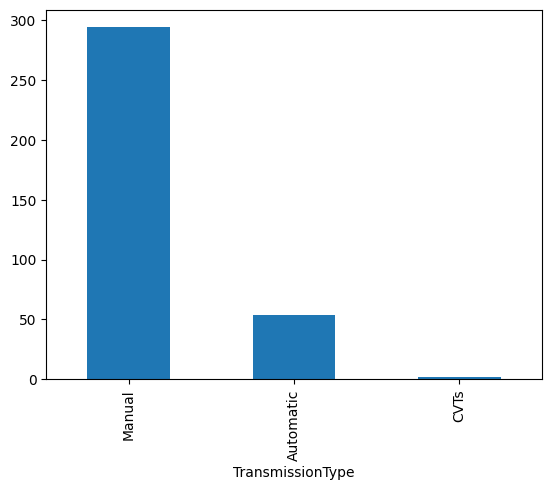

In [ ]:
df_c1['TransmissionType'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

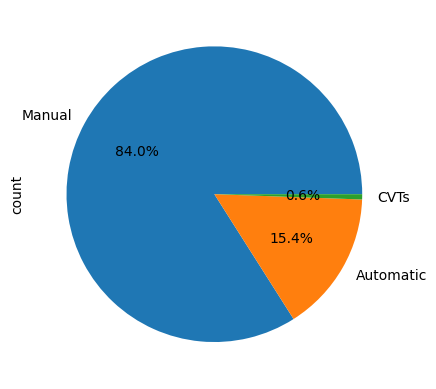

In [ ]:
df_c1['TransmissionType'].value_counts().plot(kind='pie',autopct='%.1f%%')

<Axes: >

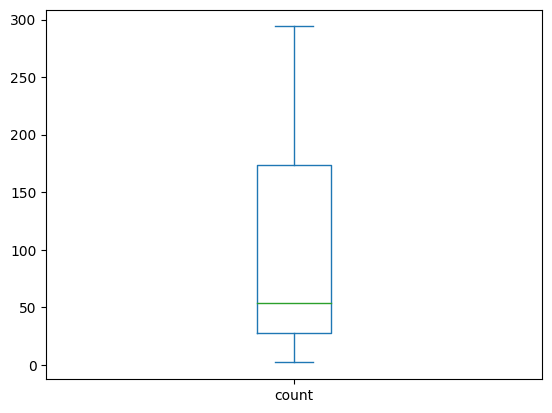

In [ ]:
df_c1['TransmissionType'].value_counts().plot(kind='box')

# CngKit

**Conclsions**
- there is more null than others total 1042

In [ ]:
df_c1['CngKit'].unique()

array([nan, 'Company Fitted', 'After Market'], dtype=object)

In [ ]:
df_c1['CngKit'].value_counts()

,count
CngKit,
Company Fitted,14
After Market,8


In [ ]:
df_c1['CngKit'].isnull().sum()

1042

In [ ]:
df_c1.head(10)

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2,Karnataka,Zippy Automart,Bangalore,0,7.5
5,559682,MERCEDES BENZ,E CLASS,E 250 CDI AVANTGARDE,DIESEL,Black,87700,SEDAN,Automatic,2013-04-01,2013,NaN,9.99 Lakhs,3,Karnataka,Zippy Automart,Bangalore,0,7.2
6,560083,VOLKSWAGEN,AMEO,HIGHLINE DIESEL DSG,DIESEL,Blue,70577,SEDAN,NaN,2017-06-01,2017,NaN,6.75 Lakhs,1,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
7,560659,MARUTI SUZUKI,ERTIGA,ZXI,PETROL,A Blue,76259,MPV,NaN,2013-07-01,2013,NaN,6 Lakhs,1,Karnataka,NK Cars,Bangalore,1,7.6
8,560662,MARUTI SUZUKI,SWIFT,LXI,PETROL,Silver,85000,HATCHBACK,Manual,2015-02-01,2015,NaN,4.8 Lakhs,3,Karnataka,NK Cars,Bangalore,0,7.4
9,560666,HYUNDAI,I10,MAGNA,PETROL,Red,77000,HATCHBACK,Manual,2008-05-01,2008,NaN,2.4 Lakhs,2,Karnataka,NK Cars,Bangalore,0,7.2


# Univaraible

# Kilometer
**Conclusions**
- Maximum kilometer runs cars is 640000
- Minimum Kilometer runs cars is 101
- Null is not present.
- The data is highly(postively)skewed.
- Outlinear is present

In [ ]:
df_c1['Kilometer'].describe()

,Kilometer
count,1064.000000
mean,52807.187970
std,33840.296979
min,101.000000
25%,32113.500000
50%,49432.000000
75%,68828.500000
max,640000.000000


In [ ]:
df_c1[df_c1['Kilometer'] ==	101]


,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
170,561218,MG,HECTOR PLUS(2021-2023),SHARP 2.0 DIESEL,DIESEL,Burgundy,101,SUV,NaN,2022-12-01,2022,NaN,22.63 Lakhs,1,Maharashtra,Car&Bike Superstore Pune,Pune,1,8.3


In [ ]:
df_c1[df_c1['Kilometer'] ==	640000]


,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
212,573326,HYUNDAI,I10,SPORTZ 1.2 AT KAPPA2,PETROL,Silver,640000,HATCHBACK,Automatic,2012-08-01,2012,NaN,3.5 Lakhs,1,Maharashtra,OM Motors,Pune,0,7.5


In [ ]:
df_c1['Kilometer'].isnull().sum()

0

<Axes: ylabel='Frequency'>

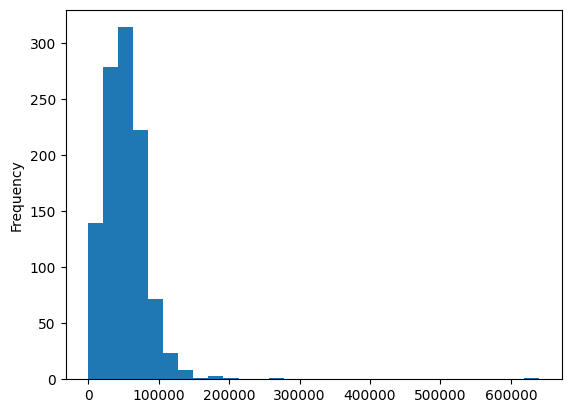

In [ ]:
df_c1['Kilometer'].plot(kind='hist',bins=30)

<Axes: ylabel='Density'>

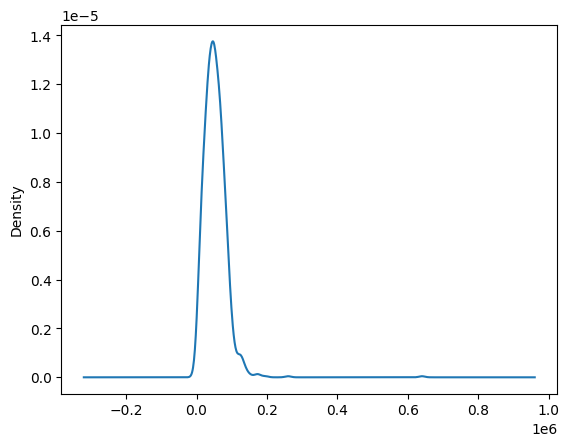

In [ ]:
df_c1['Kilometer'].plot(kind='kde')

<Axes: >

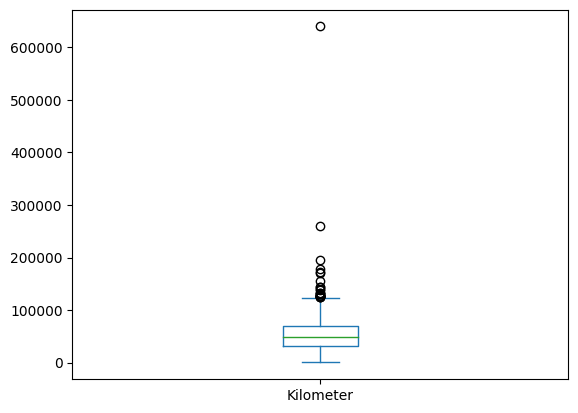

In [ ]:
df_c1['Kilometer'].plot(kind='box')

# Price

**Changes**
- Data transformation 5.75 lakhs to 575000.
- Rename new_column name "Prices".
- Insert new_column into the dataset.
- Data is highly(positively) skewed.
- Remove the Price column.
- changes are done in a copy of dataset named "df_c1"
- One variable had a comma we replaced with nothing
- As per research honda city second hand price not more than 10 Lakhs

In [ ]:
df_c1['Price']

,Price
0,5.75 Lakhs
1,4.35 Lakhs
2,4.7 Lakhs
3,9.9 Lakhs
4,2.7 Lakhs
...,...
1059,7.15 Lakhs
1060,5.00 Lakhs
1061,5.75 Lakhs
1062,7.71 Lakhs


In [ ]:
df_c1['Price'].value_counts()

,count
Price,
6.25 Lakhs,22
6.75 Lakhs,20
4.5 Lakhs,20
8.5 Lakhs,19
7.5 Lakhs,17
...,...
16.2 Lakhs,1
9.16 Lakhs,1
21.49 Lakhs,1


In [ ]:
df_c1['Price'].unique()

array(['5.75 Lakhs', '4.35 Lakhs', '4.7 Lakhs', '9.9 Lakhs', '2.7 Lakhs',
       '9.99 Lakhs', '6.75 Lakhs', '6 Lakhs', '4.8 Lakhs', '2.4 Lakhs',
       '6.5 Lakhs', '5 Lakhs', '11.35 Lakhs', '8.75 Lakhs', '13.5 Lakhs',
       '5.95 Lakhs', '7.55 Lakhs', '4.1 Lakhs', '5.25 Lakhs',
       '4.85 Lakhs', '6.45 Lakhs', '15.45 Lakhs', '7.15 Lakhs',
       '6.55 Lakhs', '2.35 Lakhs', '5.55 Lakhs', '3.75 Lakhs',
       '6.2 Lakhs', '2.75 Lakhs', '9.5 Lakhs', '5.3 Lakhs', '6.25 Lakhs',
       '8.25 Lakhs', '7.6 Lakhs', '4.95 Lakhs', '4.55 Lakhs',
       '3.45 Lakhs', '3.35 Lakhs', '6.8 Lakhs', '5.15 Lakhs',
       '3.15 Lakhs', '8.5 Lakhs', '8.9 Lakhs', '2.95 Lakhs', '7.3 Lakhs',
       '17.75 Lakhs', '7.75 Lakhs', '7.35 Lakhs', '4.2 Lakhs',
       '6.1 Lakhs', '5.65 Lakhs', '5.85 Lakhs', '7.85 Lakhs',
       '6.95 Lakhs', '8.85 Lakhs', '10.75 Lakhs', '4.45 Lakhs',
       '4.75 Lakhs', '8.95 Lakhs', '7.25 Lakhs', '5.5 Lakhs',
       '5.49 Lakhs', '2.85 Lakhs', '14 Lakhs', '5.7 Lakhs', '9.75 La

In [ ]:
df_c1['Price'].isnull().sum()

0

In [ ]:
value_port = [price.split()[0].replace(',', '') for price in df['Price']]
value_port = [float(x) for x in value_port] # If you want to convert the values to integers

In [ ]:
value_port

[5.75,
 4.35,
 4.7,
 9.9,
 2.7,
 9.99,
 6.75,
 6.0,
 4.8,
 2.4,
 6.5,
 5.0,
 11.35,
 8.75,
 13.5,
 5.95,
 6.75,
 7.55,
 4.1,
 5.25,
 4.85,
 6.45,
 15.45,
 7.15,
 6.55,
 2.35,
 5.55,
 3.75,
 6.2,
 2.75,
 9.5,
 5.3,
 6.2,
 6.25,
 8.25,
 7.6,
 4.95,
 4.55,
 3.45,
 6.75,
 3.35,
 6.8,
 5.15,
 5.95,
 3.15,
 5.15,
 8.5,
 8.9,
 2.95,
 7.3,
 17.75,
 7.75,
 7.35,
 4.2,
 6.1,
 6.25,
 5.65,
 5.85,
 7.85,
 6.95,
 6.75,
 8.75,
 6.1,
 6.75,
 8.85,
 10.75,
 4.45,
 2.4,
 6.25,
 4.75,
 8.95,
 4.55,
 2.75,
 7.25,
 8.95,
 6.25,
 5.5,
 5.49,
 2.85,
 14.0,
 5.7,
 9.75,
 8.75,
 10.2,
 7.35,
 12.75,
 6.95,
 4.75,
 7.5,
 6.45,
 5.95,
 4.25,
 3.95,
 7.35,
 4.95,
 9.0,
 6.95,
 9.85,
 7.95,
 1.65,
 5.95,
 2.75,
 9.25,
 5.25,
 22.75,
 5.89,
 2.95,
 11.25,
 6.85,
 5.45,
 6.75,
 4.95,
 6.65,
 7.5,
 9.0,
 8.95,
 6.45,
 5.35,
 2.95,
 5.95,
 3.45,
 8.5,
 4.95,
 8.25,
 3.95,
 3.35,
 7.95,
 2.9,
 3.65,
 3.72,
 17.5,
 7.75,
 5.0,
 10.85,
 8.5,
 8.25,
 5.45,
 5.95,
 4.25,
 6.25,
 17.9,
 14.25,
 6.5,
 7.0,
 4.75,
 5.85,
 7.

In [ ]:
len(value_port)

1064

In [ ]:
lakhs_value = []
for i in value_port:
  if i != 95000:  # Ignore 95000
    lakhs = i * 100000  # Convert to float before multiplication
    lakhs = int(lakhs)
    lakhs_value.append(lakhs)
  elif i == 95000:
    lakhs_value.append(i)

print(lakhs_value)

[575000, 434999, 470000, 990000, 270000, 999000, 675000, 600000, 480000, 240000, 650000, 500000, 1135000, 875000, 1350000, 595000, 675000, 755000, 409999, 525000, 484999, 645000, 1545000, 715000, 655000, 235000, 555000, 375000, 620000, 275000, 950000, 530000, 620000, 625000, 825000, 760000, 495000, 455000, 345000, 675000, 335000, 680000, 515000, 595000, 315000, 515000, 850000, 890000, 295000, 730000, 1775000, 775000, 735000, 420000, 610000, 625000, 565000, 585000, 785000, 695000, 675000, 875000, 610000, 675000, 885000, 1075000, 445000, 240000, 625000, 475000, 894999, 455000, 275000, 725000, 894999, 625000, 550000, 549000, 285000, 1400000, 570000, 975000, 875000, 1019999, 735000, 1275000, 695000, 475000, 750000, 645000, 595000, 425000, 395000, 735000, 495000, 900000, 695000, 985000, 795000, 165000, 595000, 275000, 925000, 525000, 2275000, 589000, 295000, 1125000, 685000, 545000, 675000, 495000, 665000, 750000, 900000, 894999, 645000, 535000, 295000, 595000, 345000, 850000, 495000, 82500

In [ ]:
len(lakhs_value)

1064

In [ ]:
df_c1.insert(15,"Selling_price",lakhs_value)

In [ ]:
df_c1 = df_c1.rename(columns={'Selling_price':'Prices'},inplace= False)

In [ ]:
df_c1.sample(10)

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,Prices,DealerName,City,Warranty,QualityScore
443,583464,AUDI,A6,2.0 TDI PREMIUM PLUS,DIESEL,White,22000,SEDAN,Automatic,2014-02-01,2014,NaN,14.5 Lakhs,1,Delhi,1450000.0,Carz Villa,Delhi,0,6.9
985,552664,HYUNDAI,I20,SPORTZ 1.4 CRDI,DIESEL,Carbon Bronze,76098,HATCHBACK,Manual,2014-05-01,2014,NaN,3.5 Lakhs,2,West Bengal,350000.0,Royal Motors (Prop. Auto Carriage Pvt Ltd),Kolkata,1,7.6
555,546218,FORD,ECOSPORT,TITANIUM 1.5 TDCI,DIESEL,Smoke Grey,80199,SUV,Manual,2016-06-01,2016,NaN,5.7 Lakhs,1,Haryana,570000.0,Taneja Fourwheels,Gurgaon,1,7.7
973,549964,HYUNDAI,GRAND I10,SPORTZ 1.2 KAPPA VTVT,PETROL,Maroon,42500,HATCHBACK,Manual,2015-06-01,2015,NaN,3.5 Lakhs,1,West Bengal,350000.0,Universal Wheels,Kolkata,0,8.1
429,582383,MARUTI SUZUKI,BALENO,DELTA 1.2 BS-VI,PETROL,White,22376,HATCHBACK,NaN,2021-04-01,2021,NaN,6.9 Lakhs,1,Delhi,690000.0,Max Motors,Delhi,0,8.8
168,558918,MARUTI SUZUKI,WAGON R 1.0,VXI + AMT,PETROL,Silver,32079,HATCHBACK,NaN,2018-03-01,2018,NaN,5.5 Lakhs,1,Maharashtra,550000.0,Car&Bike Select - Sahyadri Motors Pune,Pune,1,7.9
267,581994,TATA,MANZA(2011_2015),EX QUADRAJET,DIESEL,Wine Red,46624,SEDAN,NaN,2013-12-01,2013,NaN,3.65 Lakhs,2,Maharashtra,365000.0,Car&Bike Superstore Pune,Pune,0,6.4
664,534024,HYUNDAI,GRAND I10,1.2 KAPPA SPORTZ,PETROL,White,49154,HATCHBACK,Manual,2018-02-01,2018,Company Fitted,5.8 Lakhs,1,Uttar Pradesh,580000.0,Heritage Expo car Sales Pvt Ltd,Noida,1,7.8
804,556527,HONDA,CITY,VX CVT PETROL BS-VI,PETROL,White,59524,SEDAN,NaN,2019-08-01,2019,NaN,10.5 Lakhs,1,Telangana,1050000.0,Sri Vaishnavi Cars,Hyderabad,1,7.9
800,555930,RENAULT,KWID,1.0 RXT AMT O,PETROL,White,30985,HATCHBACK,NaN,2018-07-01,2018,NaN,4.3 Lakhs,1,Telangana,430000.0,Sri Vaishnavi Cars,Hyderabad,1,7.7


In [ ]:
# df_c1=df_c1.drop('Price',axis=1)

<Axes: ylabel='Density'>

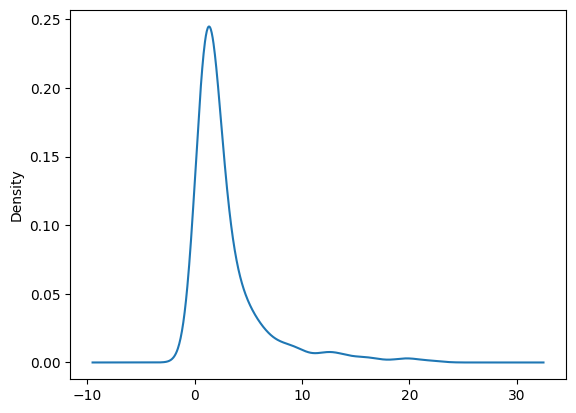

In [ ]:
df_c1['Prices'].value_counts().plot(kind='kde')

In [ ]:
df_c1['Prices'].skew()

3.5470677060516125

<Axes: >

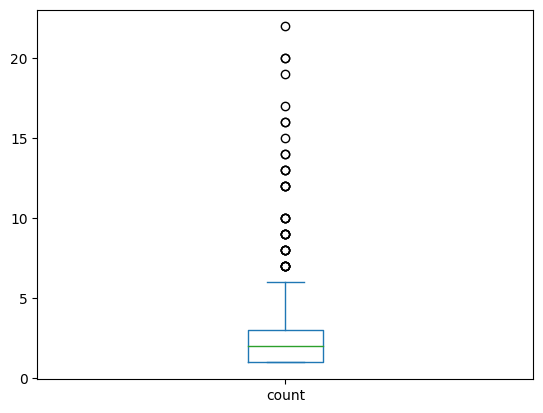

In [ ]:
df_c1['Prices'].value_counts().plot(kind='box')

In [ ]:
df_c1

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,Prices,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1,Karnataka,575000.0,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1,Karnataka,434999.0,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1,Karnataka,470000.0,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1,Karnataka,990000.0,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2,Karnataka,270000.0,Zippy Automart,Bangalore,0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,588906,HYUNDAI,ELITE I20(2020-2020),ASTA O 1.2 BS VI,PETROL,White,42918,HATCHBACK,NaN,2020-09-01,2020,NaN,7.15 Lakhs,1,Rajasthan,715000.0,K.S. Motors,Jaipur,1,8.3
1060,588945,HYUNDAI,XCENT(2017-2020),S,PETROL,White,78910,SEDAN,NaN,2019-01-01,2019,NaN,5.00 Lakhs,1,Rajasthan,500000.0,Rajasthan Car World,Jaipur,0,7.8
1061,588946,MAHINDRA,SCORPIO(2009-2014),VLX 2WD BS-III,DIESEL,White,76000,SUV,NaN,2013-05-01,2013,NaN,5.75 Lakhs,1,Rajasthan,575000.0,Rajasthan Car World,Jaipur,0,6.8
1062,588949,MARUTI SUZUKI,VITARA BREZZA,VDI,DIESEL,Silver,80120,HATCHBACK,NaN,2018-06-01,2018,NaN,7.71 Lakhs,1,Rajasthan,771000.0,Rajasthan Car World,Jaipur,0,7.4


In [ ]:
df_c1['Prices'].isnull().sum()

0

# ManufactureDate

**conclsions**
- Removed this column

In [ ]:
df_c2=df_c1.copy()

In [ ]:
df_c2['ManufactureDate']

,ManufactureDate
0,2018-02-01
1,2021-03-01
2,2015-03-01
3,2020-08-01
4,2010-11-01
...,...
1059,2020-09-01
1060,2019-01-01
1061,2013-05-01
1062,2018-06-01


In [ ]:
df_c2=df_c2.drop('ManufactureDate', axis=1)

# Id
**Conclusion**
- Id column has no use in data analysis
- Drop this column

In [ ]:
df_c2['Id']

,Id
0,555675
1,556383
2,556422
3,556771
4,559619
...,...
1059,588906
1060,588945
1061,588946
1062,588949


In [ ]:
df_c2.drop(['Id'],axis=1,inplace=True)

In [ ]:
df_c2.head(10)

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ModelYear,CngKit,Price,Owner,DealerState,Prices,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018,NaN,5.75 Lakhs,1,Karnataka,575000.0,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021,NaN,4.35 Lakhs,1,Karnataka,434999.0,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015,NaN,4.7 Lakhs,1,Karnataka,470000.0,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020,NaN,9.9 Lakhs,1,Karnataka,990000.0,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010,NaN,2.7 Lakhs,2,Karnataka,270000.0,Zippy Automart,Bangalore,0,7.5
5,MERCEDES BENZ,E CLASS,E 250 CDI AVANTGARDE,DIESEL,Black,87700,SEDAN,Automatic,2013,NaN,9.99 Lakhs,3,Karnataka,999000.0,Zippy Automart,Bangalore,0,7.2
6,VOLKSWAGEN,AMEO,HIGHLINE DIESEL DSG,DIESEL,Blue,70577,SEDAN,NaN,2017,NaN,6.75 Lakhs,1,Karnataka,675000.0,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
7,MARUTI SUZUKI,ERTIGA,ZXI,PETROL,A Blue,76259,MPV,NaN,2013,NaN,6 Lakhs,1,Karnataka,600000.0,NK Cars,Bangalore,1,7.6
8,MARUTI SUZUKI,SWIFT,LXI,PETROL,Silver,85000,HATCHBACK,Manual,2015,NaN,4.8 Lakhs,3,Karnataka,480000.0,NK Cars,Bangalore,0,7.4
9,HYUNDAI,I10,MAGNA,PETROL,Red,77000,HATCHBACK,Manual,2008,NaN,2.4 Lakhs,2,Karnataka,240000.0,NK Cars,Bangalore,0,7.2


# ModelYear
**conclsions**
- null value is not present

In [ ]:
df_c2['ModelYear'].value_counts().sort_index(ascending=True)

,count
ModelYear,
2003,1
2008,6
2009,8
2010,18
2011,23
2012,34
2013,45
2014,80
2015,97


<Axes: xlabel='ModelYear'>

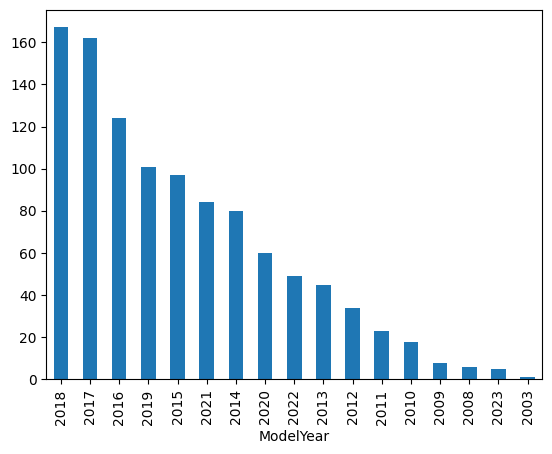

In [ ]:
df_c2['ModelYear'].value_counts().plot(kind='bar')

In [ ]:
df_c2['ModelYear'].isnull().sum()

0

In [ ]:
df_c2.isnull().sum()

,0
Company,0
Model,0
Variant,0
FuelType,1
Colour,0
Kilometer,0
BodyStyle,0
TransmissionType,714
ModelYear,0
CngKit,1042


# QualityScore

**Conclusions**
- Maximum QulityScore of cars 9.4
- Minimum QulityScore of cars 0
- Outliear are present
- Highly(Negetively)skwed distribution


In [ ]:
df_c2['QualityScore'].describe()

,QualityScore
count,1064.000000
mean,7.770207
std,0.719717
min,0.000000
25%,7.500000
50%,7.800000
75%,8.100000
max,9.400000


In [ ]:
df_c2['QualityScore'].isnull().sum()

0

<Axes: ylabel='Frequency'>

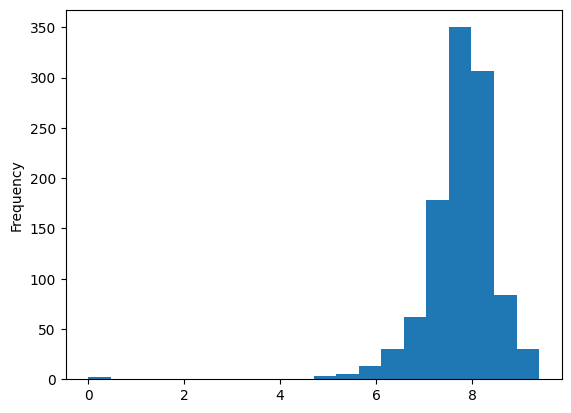

In [ ]:
df_c2['QualityScore'].plot(kind='hist',bins=20,)

<Axes: ylabel='Density'>

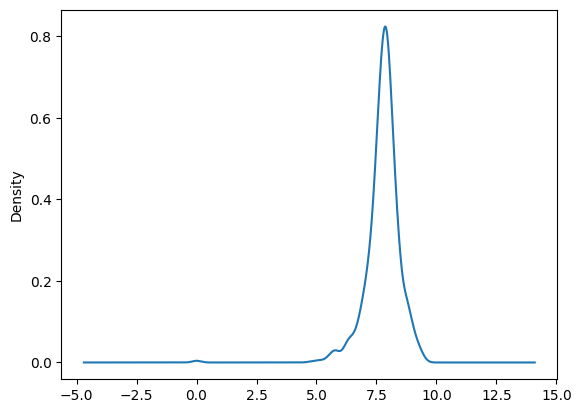

In [ ]:
df_c2['QualityScore'].plot(kind='kde')

In [ ]:
df_c2['QualityScore'].skew()

-2.868197827292174

<Axes: >

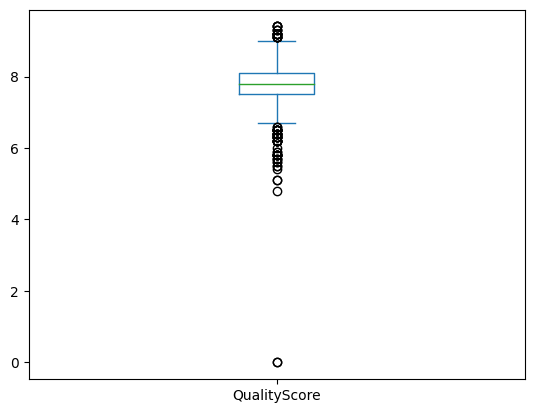

In [ ]:
df_c2['QualityScore'].plot(kind='box')

# Warranty
**Conclusions**
- No null present
- 1 year warranty cars is more than 0 waaranty
- It can play big in predic

In [ ]:
df_c2['Warranty'].unique()

array([1, 0])

In [ ]:
df_c2['Warranty'].value_counts()

,count
Warranty,
1,786
0,278


In [ ]:
df['Warranty'].describe()

,Warranty
count,1064.000000
mean,0.738722
std,0.439538
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df['Warranty'].isnull().sum()

0

<Axes: xlabel='Warranty'>

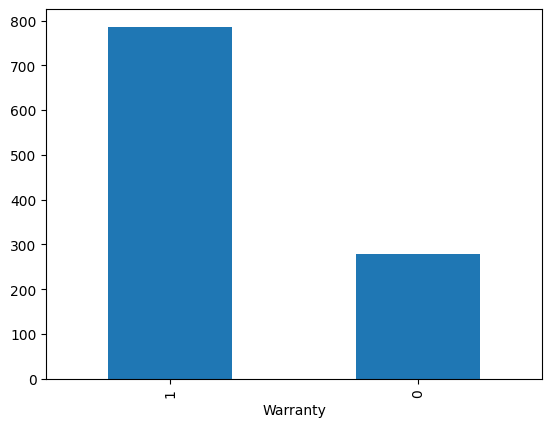

In [ ]:
df['Warranty'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

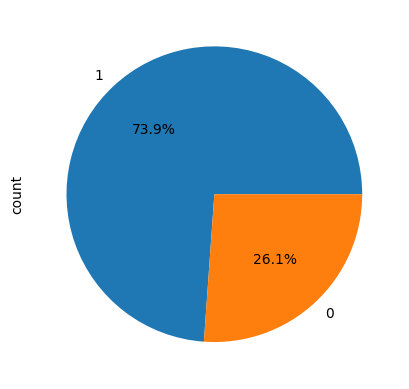

In [ ]:
df['Warranty'].value_counts().plot(kind='pie',autopct='%0.1f%%')

# Company
**Conclsion**
- Null value is not present.
- 23 cars companies

In [ ]:
df_c2['Company'].unique()

array(['MARUTI SUZUKI', 'HYUNDAI', 'TATA', 'FORD', 'MERCEDES BENZ',
       'VOLKSWAGEN', 'MAHINDRA', 'HONDA', 'RENAULT', 'NISSAN', 'JEEP',
       'FIAT', 'TOYOTA', 'KIA', 'BMW', 'DATSUN', 'SKODA', 'MG', 'AUDI',
       'ISUZU', 'VOLVO', 'MITSUBISHI', 'CHEVROLET'], dtype=object)

In [ ]:
df_c2['Company'].value_counts()

,count
Company,
MARUTI SUZUKI,252
HYUNDAI,199
HONDA,126
MAHINDRA,96
TATA,60
FORD,58
TOYOTA,54
RENAULT,40
VOLKSWAGEN,37


In [ ]:
df_c2['Company'].isnull().sum()

0

<Axes: xlabel='Company'>

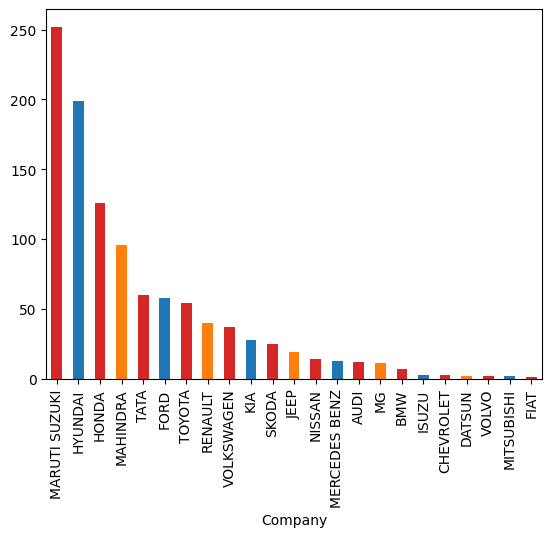

In [ ]:
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

df_c2['Company'].value_counts().plot(kind='bar',color=bar_colors)

# Model

**Conclsions**
- Think on spliting variables.

In [ ]:
df_c2['Model']

,Model
0,CELERIO(2017-2019)
1,ALTO
2,GRAND I10
3,NEXON
4,FIGO
...,...
1059,ELITE I20(2020-2020)
1060,XCENT(2017-2020)
1061,SCORPIO(2009-2014)
1062,VITARA BREZZA


In [ ]:
df_c2['Model'].unique()

array(['CELERIO(2017-2019)', 'ALTO', 'GRAND I10', 'NEXON', 'FIGO',
       'E CLASS', 'AMEO', 'ERTIGA', 'SWIFT', 'I10', 'CELERIO',
       'CRETA(2018-2019)', 'VITARA BREZZA', 'XUV500', 'JAZZ', 'DUSTER',
       'MICRA ACTIVE', 'COMPASS', 'ELITE I20', 'TERRANO',
       'FIESTA(2008-2011)', 'XCENT', 'BRIO', 'VERNA', 'TIAGO', 'WR V',
       'BALENO', 'GRAND PUNTO', 'EON', 'I20 ACTIVE', 'ECOSPORT', 'POLO',
       'XUV500(2011_2015)', 'MICRA', 'FORTUNER', 'SWIFT DZIRE',
       'KWID(2015_2019)', 'GRAND I10(2017-2020)', 'AMAZE', 'VENUE',
       'ZEN ESTILO', 'TIGOR(2018-2020)', 'POLO(2012-2014)', 'KUV100',
       'FIGO(2012-2015)', 'TRIBER', 'ALTROZ', 'WAGON R 1.0', 'CITY',
       'SELTOS', 'CELERIO X', 'SCORPIO', 'CRETA', 'I20', 'TIGOR',
       'FIGO ASPIRE', 'ECOSPORT(2017-2019)', 'KICKS', 'SANTRO',
       'S PRESSO', 'INNOVA CRYSTA', 'XUV300', 'CIAZ', 'KWID',
       'X1(2010-2012)', 'RITZ', 'ECOSPORT(2021-2022)',
       'GRAND I10(2013-2017)', 'EECO', 'CARENS', 'XYLO', 'ASPIRE',
       'ASP

In [ ]:
df_c2['Model'].value_counts()

,count
Model,
CITY,38
SWIFT,38
BALENO,37
CRETA,30
ECOSPORT,28
...,...
E-CLASS(2013-2015),1
VIRTUS,1
ACCORD,1


# Variant
**Conclsions**
- It's very column for pridicting car price
- we will work this column in Feature Engineering section


In [ ]:
df_c2['Variant']

,Variant
0,1.0 ZXI AMT O
1,LXI
2,1.2 KAPPA ASTA
3,XT PLUS
4,EXI DURATORQ 1.4
...,...
1059,ASTA O 1.2 BS VI
1060,S
1061,VLX 2WD BS-III
1062,VDI


In [ ]:
df_c2['Variant'].unique()

array(['1.0 ZXI AMT O', 'LXI', '1.2 KAPPA ASTA', 'XT PLUS',
       'EXI DURATORQ 1.4', 'E 250 CDI AVANTGARDE', 'HIGHLINE DIESEL DSG',
       'ZXI', 'MAGNA', 'HIGHLINE 1.0L PLUS (P)', 'ZXI O MT',
       'CRDI 1.4 E PLUS', 'VDI O', 'W8 AT', '1.2 V I VTEC',
       'ASTA 1.2 KAPPA VTVT', 'RXL PETROL 104', 'XL', 'ZXI AMT', 'VXI MT',
       'VXI', 'LIMITED 2.0 DIESEL', 'MAGNA PLUS 1.2', 'XL P',
       'SXI 1.4 TDCI', 'S 1.2 OPT', 'S MT', 'MAGNA EXECUTIVE 1.2',
       'VGT CRDI 1.5', 'W8', 'XZ', '1.2 V CVT I VTEC BSIV',
       'VX MT PETROL', 'DELTA AT 1.2', 'TREND (O) WITH ABS 1.2',
       'SPORT 1.3', 'ERA PLUS', '1.2 S', '1.2 KAPPA ASTA O',
       'TITANIUM 1.5 TDCI', 'ZXI DURATORQ 1.4', 'COMFORTLINE 1.2L DIESEL',
       'XE PETROL', 'ALPHA', '3.0 MT 4X2', 'VDI ABS', 'VXI AT',
       '1.0 RXT AMT O', 'MAGNA 1.2 KAPPA VTVT', '1.2 VXMT I VTEC',
       '1.2 S I VTEC', 'SPORTZ 1.2', '1.6 CRDI S', '1.2 SMT I VTEC',
       'REVOTRON XZ PLUS', 'SX PLUS 1.0 TURBO DCT', 'VXI AMT',
       'REVOTORQ 

# FuelType
**Conclusions**
- One null value is present.
- Five category fuel is used.

In [ ]:
df_c2['FuelType']

,FuelType
0,PETROL
1,PETROL
2,PETROL
3,PETROL
4,DIESEL
...,...
1059,PETROL
1060,PETROL
1061,DIESEL
1062,DIESEL


In [ ]:
df_c2['FuelType'].value_counts()

,count
FuelType,
PETROL,670
DIESEL,365
CNG,26
HYBRID,1
LPG,1


In [ ]:
df_c2['FuelType'].isnull().sum()

1

In [ ]:
df_c2[~df_c2['FuelType'].isin([ 'PETROL','DIESEL','CNG','HYBRID','LPG'])]

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ModelYear,CngKit,Price,Owner,DealerState,Prices,DealerName,City,Warranty,QualityScore
662,HONDA,CITY 5TH GEN,V PETROL BS-VI,NaN,Brown,22974,SEDAN,NaN,2020,NaN,10.47 Lakhs,1,Uttar Pradesh,1047000.0,Noida Car Point ll,Noida,1,7.9


<Axes: xlabel='FuelType'>

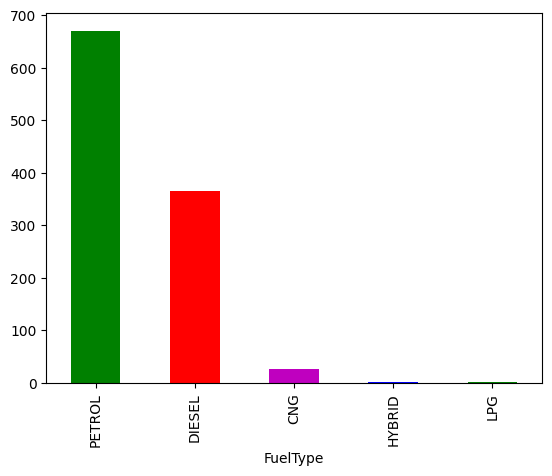

In [ ]:
colors = ['g', 'r', 'm', 'b']
df_c2['FuelType'].value_counts().plot(kind='bar',color=colors)

# Colour
**conclusion**
- There are 76 types of colours available.
- Most of the car colour is white followed by sliver and grey.

In [ ]:
df_c2['Colour']

,Colour
0,Silver
1,Red
2,Grey
3,A Blue
4,Silver
...,...
1059,White
1060,White
1061,White
1062,Silver


In [ ]:
df_c2['Colour'].unique()

array(['Silver', 'Red', 'Grey', 'A Blue', 'Black', 'Blue', 'Steel Grey',
       'Moondust Silver', 'Orange', 'Marine Blue', 'Brown', 'White',
       'White Red', 'Gold', 'Yellow', 'Pearl White', 'Maroon',
       'Forest Dew', 'Silky Silver', 'Beige', 'Purple', 'Silver Grey',
       'Metalic Grey', 'Bottle Green', 'Cherry Red', 'Warm Grey',
       'Smoke Grey', 'Bluish Silver Met.', 'Dark Grey', 'Dark Blue',
       'Intense Black', 'Diamond White', 'G. Red', 'Burgundy', 'Golden',
       'A Silver', 'Urban Titanium', 'Arizona Grey', 'Beige Blue',
       'Wine Red', 'Chocolate Brown', 'Metallic Silver', 'Riviera Red',
       'Star Silver', 'Metallic Black', 'Other', 'Golden Beige',
       'Stain Grey', 'Cherry', 'Metallic Grey', 'Modern Grey', 'Green',
       'C Silver', 'Dust', 'Prime Beige', 'Deep Red', 'Black Magic',
       'W B Mist', 'Pearl Silver', 'C.Blue', 'B.Green', 'Ocean Blue',
       'Seafoam Green', 'Sapphire Silver', 'B Mist', 'Aquamarine',
       'Carbon Bronze', 'Milky Whi

In [ ]:
df_c2['Colour'].value_counts()

,count
Colour,
White,289
Silver,134
Grey,127
Red,109
Black,64
...,...
Metallic Grey,1
Modern Grey,1
C Silver,1


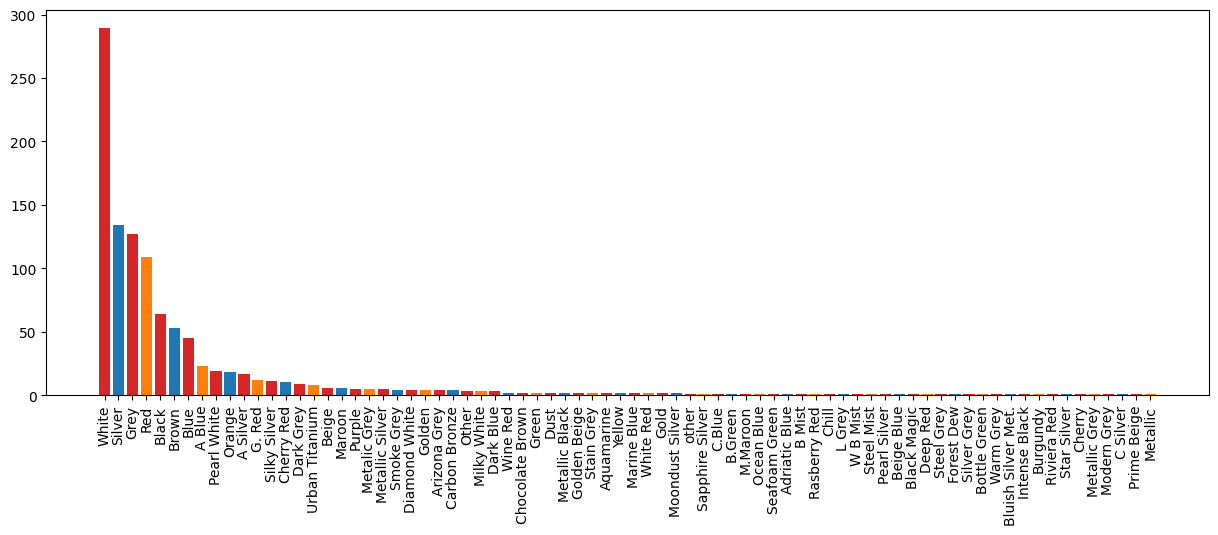

In [ ]:
fig,ax=plt.subplots(figsize=(15, 5))
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
counts=df_c2['Colour'].value_counts()
ax.bar(counts.index,counts.values,color=bar_colors)
plt.xticks(rotation=90)
plt.show()
#df_c1['Colour'].value_counts().plot(kind='bar',)

# BodyStyle

**conclusions**
- There are 6 types of body styles available.
- Most of the car's body style is HATCHBACK, followed by SUV.

In [ ]:
df_c2['BodyStyle']

,BodyStyle
0,HATCHBACK
1,HATCHBACK
2,HATCHBACK
3,HATCHBACK
4,HATCHBACK
...,...
1059,HATCHBACK
1060,SEDAN
1061,SUV
1062,HATCHBACK


In [ ]:
df_c2['BodyStyle'].value_counts()

,count
BodyStyle,
HATCHBACK,423
SUV,304
SEDAN,262
MPV,47
COMPACTSUV,15
Sedan,5
MUV,3
HATCHBACK,2
VAN,2


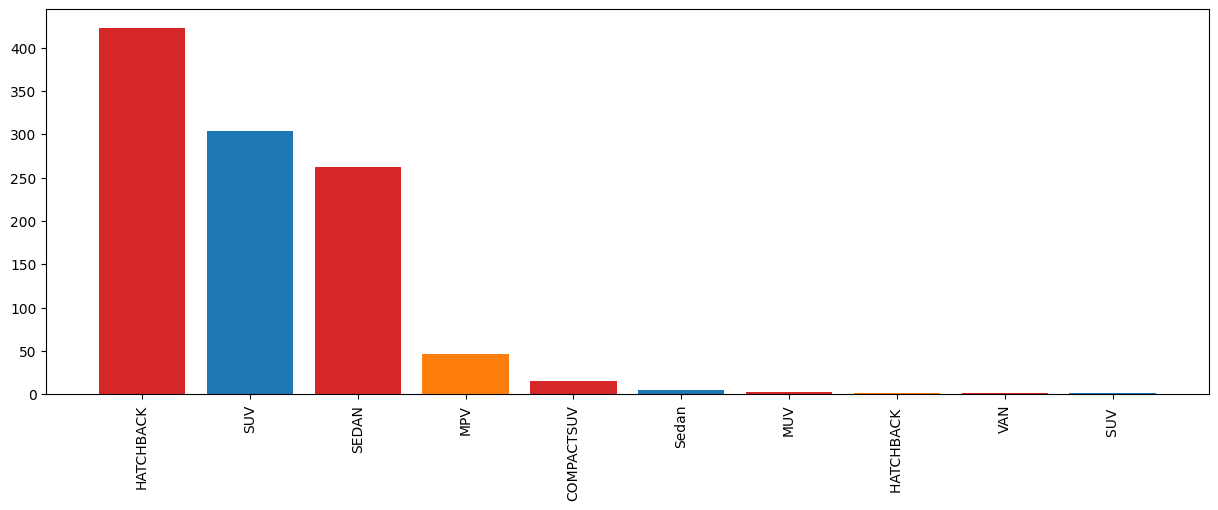

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
counts=df_c2['BodyStyle'].value_counts()
ax.bar(counts.index,counts.values,color=bar_colors)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_c2.columns

Index(['Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ModelYear', 'CngKit', 'Price',
       'Owner', 'DealerState', 'Prices', 'DealerName', 'City', 'Warranty',
       'QualityScore'],
      dtype='object')

# Dataset Information
- **ID** :-	Unique ID for each listing
- **Company**:-	Name of the car manufacturer
- **Model**:-	Name of the car model
- **Variant**:-	Name of the car variant
- **Fuel**:- Type	Fuel type of the car
- **Color**:-	Color of the car
- **Kilometer**:-	Number of kilometers driven by the car
- **Body Style**:-	Body style of the car
- **Transmission Type**:-	Transmission type of the car
- **Manufacture Date**:-	Manufacture date of the car
- **Model Year**:-	Model year of the car
- **CngKit**:-	Whether the car has a CNG kit or not
- **Price**:-	Price of the car
- **Owner Type**:-	Number of previous owners of the car
- **Dealer State**:-	State in which the car is being sold
- **Dealer Name**:-	Name of the dealer selling the car
- **City**:-	City in which the car is being sold
- **Warranty**:-	Warranty offered by the dealer
- **Quality Score**:-	Quality score of the car





In [ ]:
#Categorical Data Check
numeric_features = [feature for feature in df_c2.columns if df_c2[feature].dtype != 'O']
categorical_features = [feature for feature in df_c2.columns if df_c2[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Kilometer', 'ModelYear', 'Prices', 'Warranty', 'QualityScore']

We have 13 categorical features : ['Company', 'Model', 'Variant', 'FuelType', 'Colour', 'BodyStyle', 'TransmissionType', 'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City']


NameError: name 'categorical_features' is not defined

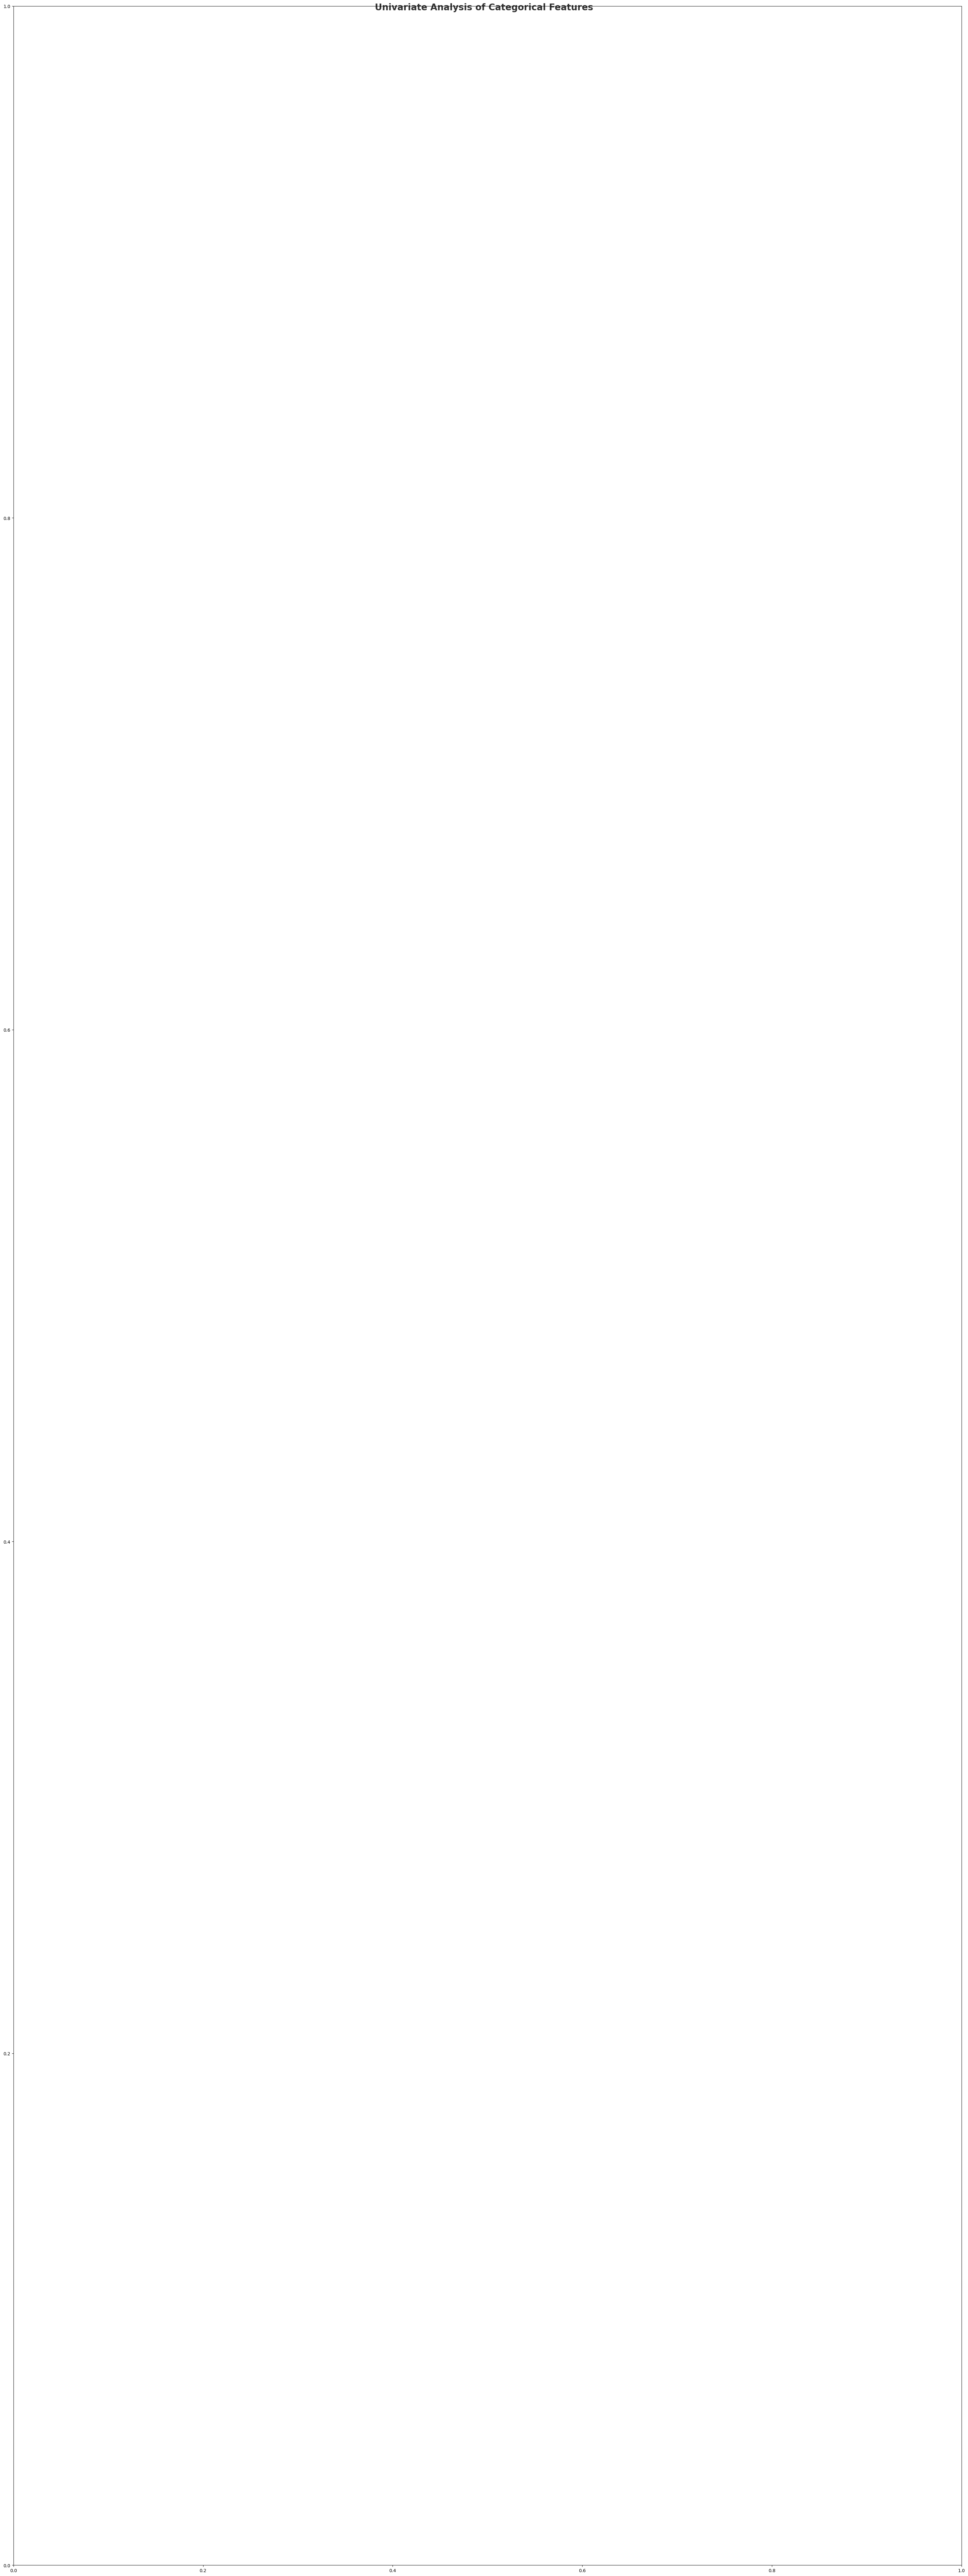

In [4]:
plt.subplots(figsize=(30, 80),layout='constrained')
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.) # yeh line heading ke liye h

for i in range(0, len(categorical_features)):
    plt.subplot(15,1, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

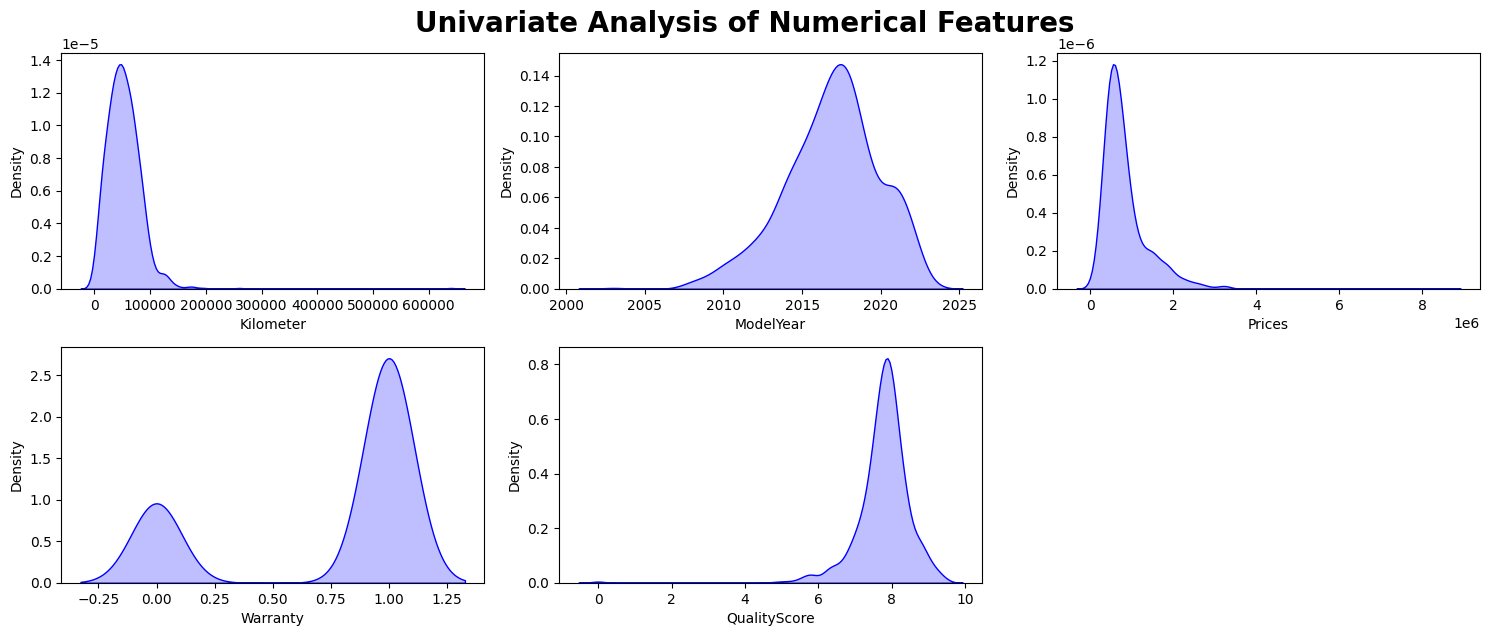

In [ ]:
#Categorical Data Check
numeric_features = [feature for feature in df_c2.columns if df_c2[feature].dtype != 'O']
categorical_features = [feature for feature in df_c2.columns if df_c2[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

# Multivariate Analysis
* correleation is not correct check one more time after completing this work.

In [ ]:
numeric_df = df_c2[numeric_features].corr()
print(numeric_df)

              Kilometer  ModelYear    Prices  Warranty  QualityScore
Kilometer      1.000000  -0.482639 -0.114085 -0.431454     -0.489320
ModelYear     -0.482639   1.000000  0.428888  0.538055      0.640554
Prices        -0.114085   0.428888  1.000000  0.121333      0.160448
Warranty      -0.431454   0.538055  0.121333  1.000000      0.482102
QualityScore  -0.489320   0.640554  0.160448  0.482102      1.000000


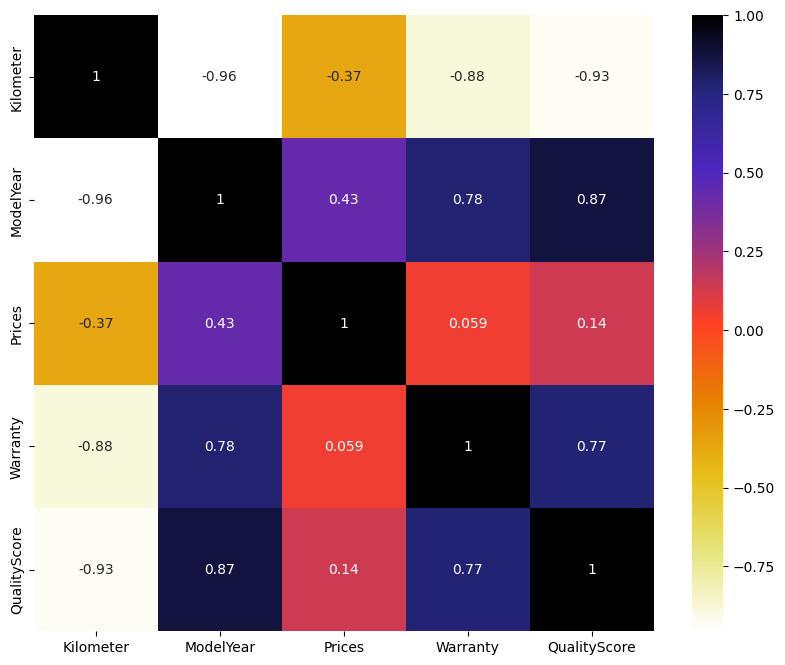

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),cmap=('CMRmap_r'),annot=True)
plt.show()

**Report**
- **Prices** and **Kilometer** are negatively correlated.
- **ModelYear** and **QualityScore** are positively correlated.
- **ModelYear** and **Prices** are positively correlated.
- **Prices** and **Warranty** are positively correlated.
- **Prices** and **QualityScore** are positively correlated.


In [ ]:
df_c2.isnull().sum()

,0
Company,0
Model,0
Variant,0
FuelType,1
Colour,0
Kilometer,0
BodyStyle,0
TransmissionType,714
ModelYear,0
CngKit,1042


In [ ]:
continuous_features=[feature for feature in numeric_features if len(df_c2[feature].unique())>=30]
print('Num of continues features :',continuous_features)

Num of continues features : ['Kilometer', 'Prices', 'QualityScore']


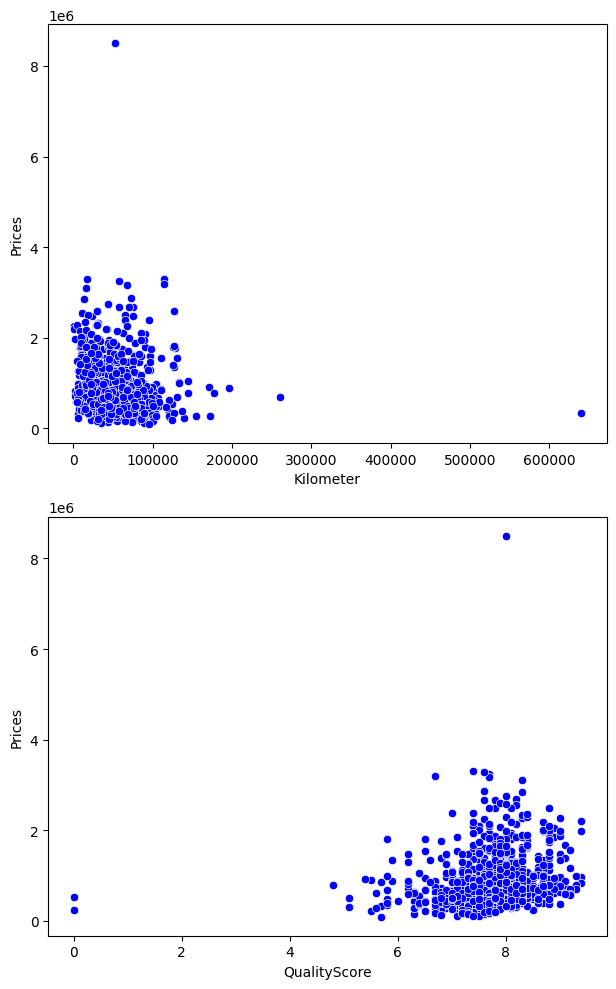

In [ ]:
fig = plt.figure(figsize=(12, 10))

for i in range(0, len(continuous_features)):
    if continuous_features[i] != 'Prices':
        ax = plt.subplot(2, 2, i+1)
        sns.scatterplot(data= df_c2 ,y='Prices', x=continuous_features[i], color='b')
        plt.tight_layout()

**Report**
- Continuous columns check the relationship with the Target column.
- Prices and QualityScore has positively corrleated.
-

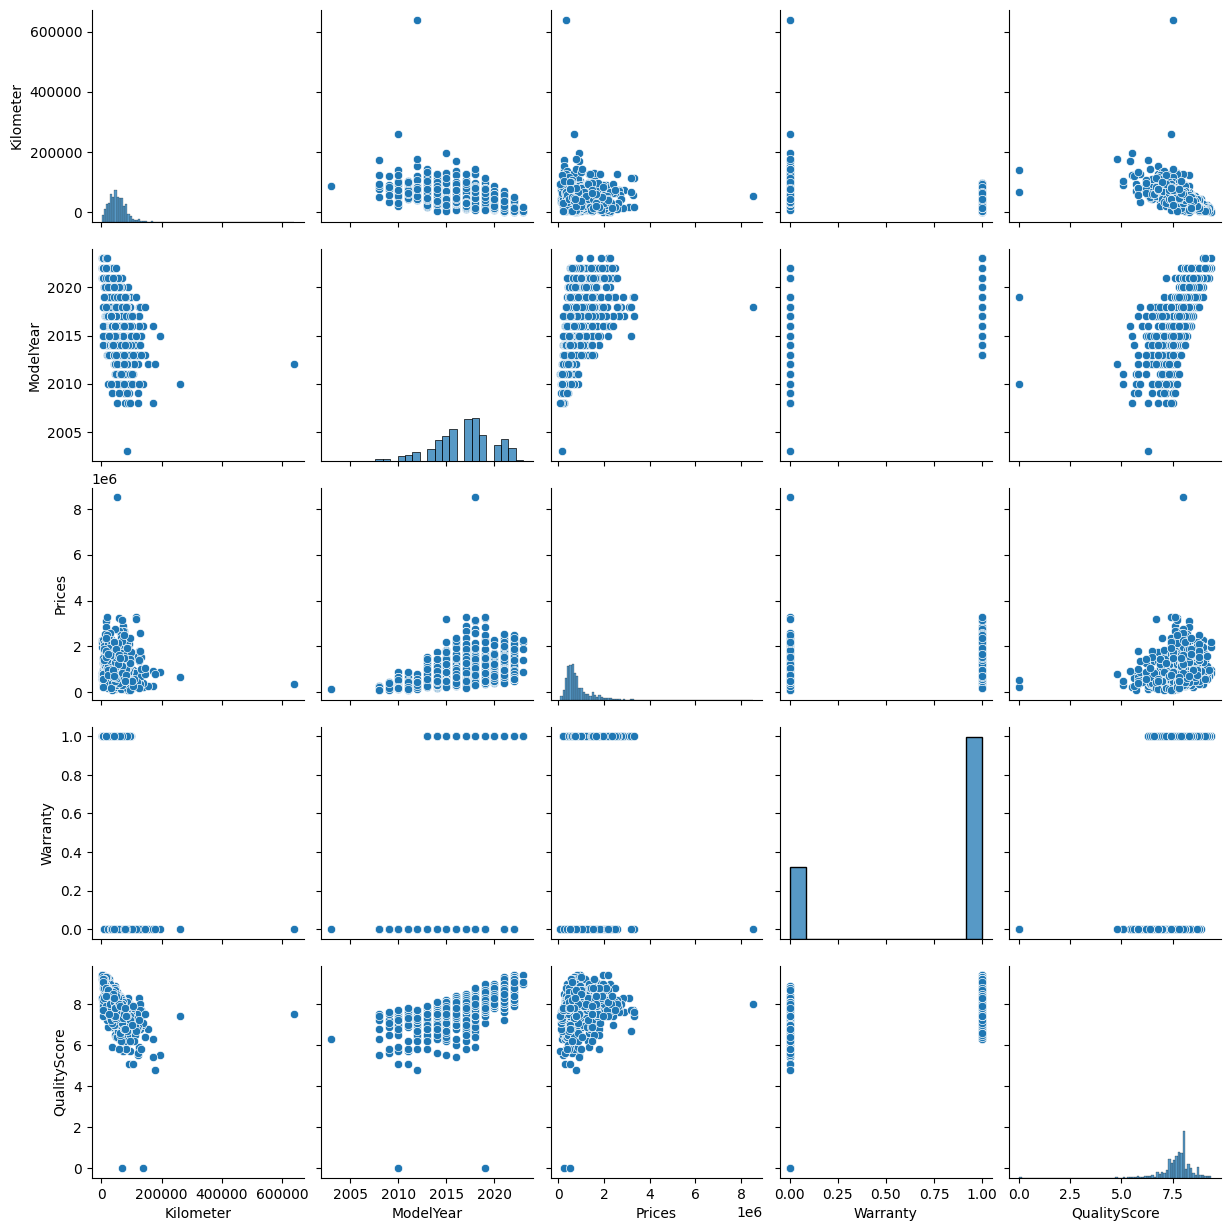

In [ ]:
sns.pairplot(data=df_c2)

# Visualization

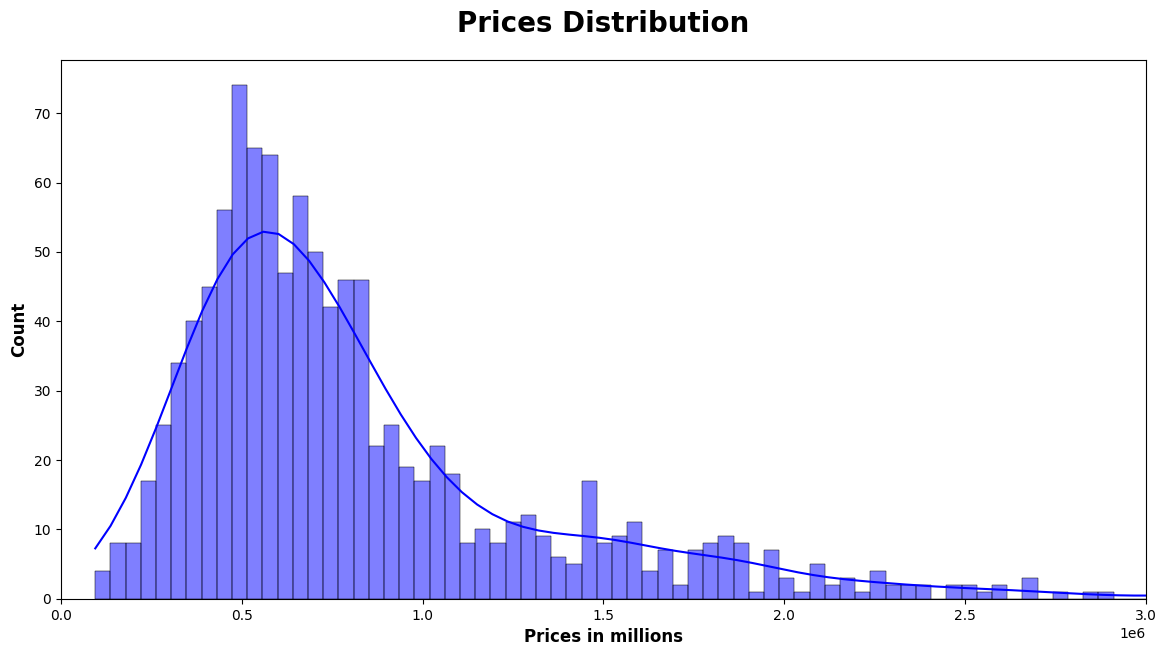

In [ ]:
plt.subplots(figsize=(14,7))
sns.histplot(df_c2.Prices, bins=200, kde=True, color = 'b')
plt.title("Prices Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Prices in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

** Report **
- Skewed Data

In [ ]:
df_c2.columns


Index(['Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ModelYear', 'CngKit', 'Price',
       'Owner', 'DealerState', 'Prices', 'DealerName', 'City', 'Warranty',
       'QualityScore'],
      dtype='object')

# Most Selling Car

**Report**
- As per the chart these are the Top 10 Companies that sold more Used Cars.
- Most Sold car is MARUTI SUZUKI over  200 followed by HYUNDAI and HONDA.

In [ ]:
df_c2['Company'].value_counts()[:10]

,count
Company,
MARUTI SUZUKI,252
HYUNDAI,199
HONDA,126
MAHINDRA,96
TATA,60
FORD,58
TOYOTA,54
RENAULT,40
VOLKSWAGEN,37


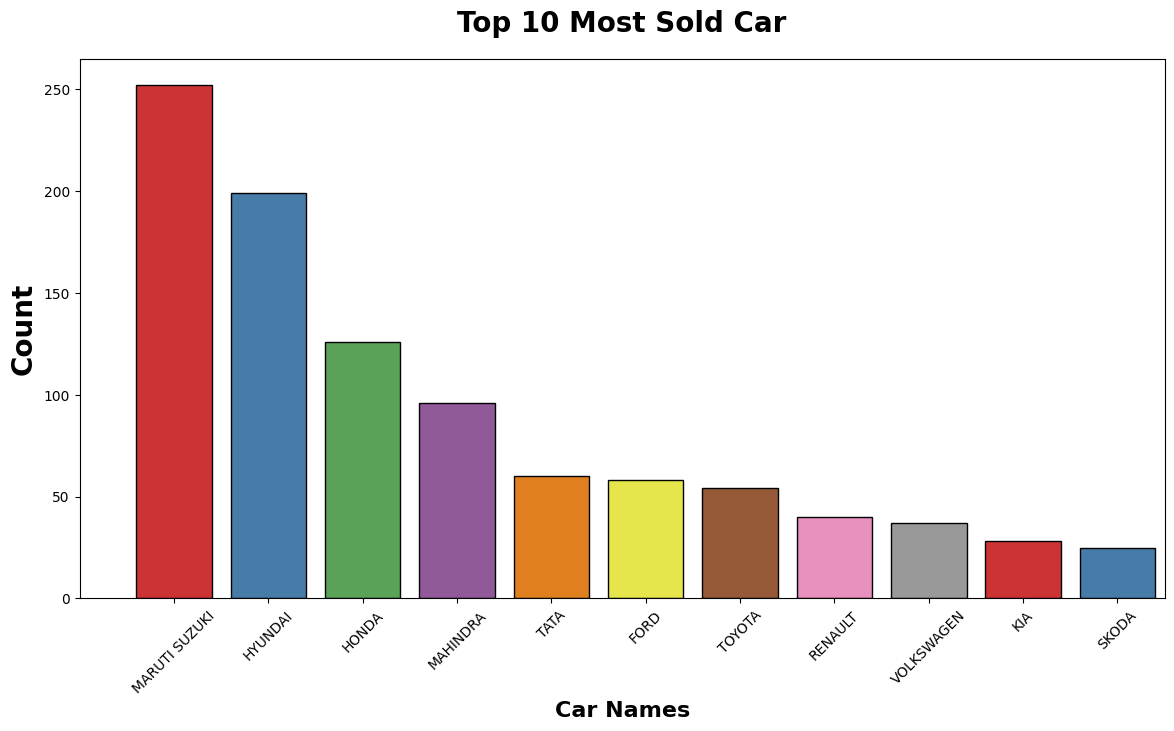

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Company", data=df_c2,ec = "black",palette="Set1",order = df_c2['Company'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Names", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [ ]:
MARUTI_SUZUKI = df_c2[df_c2['Company'] == 'MARUTI SUZUKI']['Prices'].mean()
print(f'The mean price of MARUTI SUZUKI is {MARUTI_SUZUKI:.2f} Rupees')

The mean price of MARUTI SUZUKI is 592956.31 Rupees


In [ ]:
df_c2['Prices'].max()

8500000.0

# Most Selling Model

**Report**
- CITY and SWIFT are equal qunatity followed by BALENO.

In [ ]:
df_c2['Model'].value_counts()[:10]

,count
Model,
CITY,38
SWIFT,38
BALENO,37
CRETA,30
ECOSPORT,28
AMAZE,26
GRAND I10,25
JAZZ,22
VITARA BREZZA,22


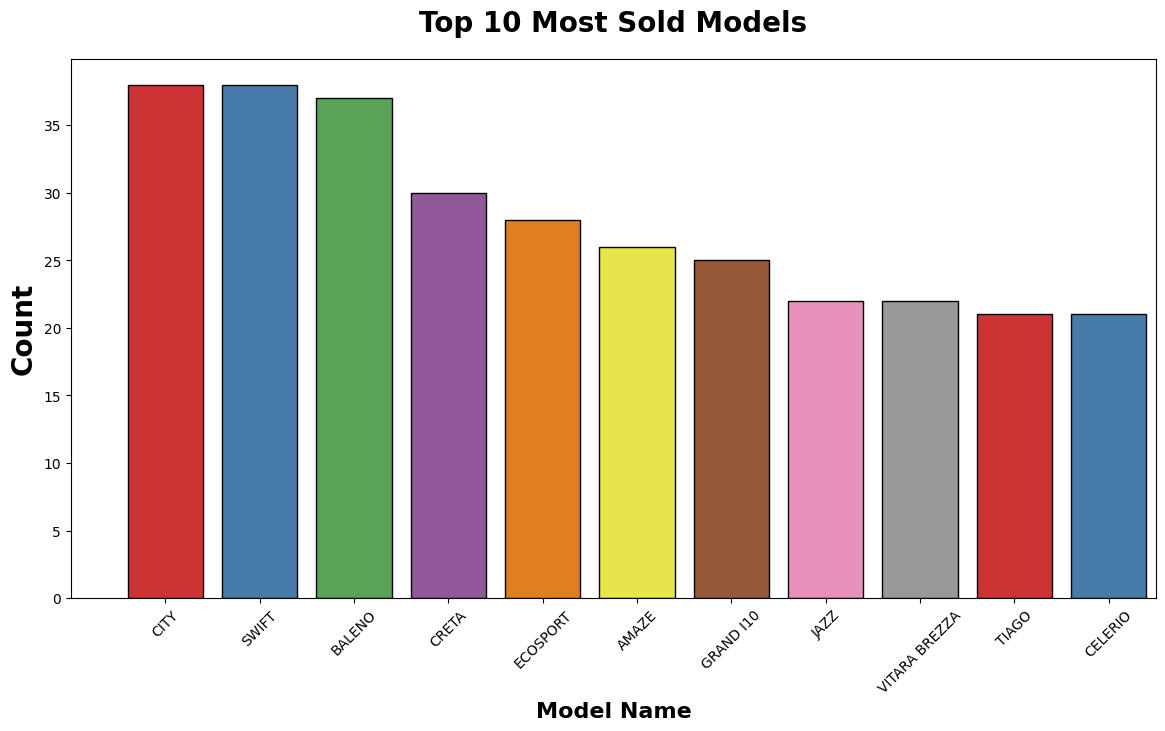

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Model", data=df_c2,ec = "black",palette="Set1",order = df_c2['Model'].value_counts().index)
plt.title("Top 10 Most Sold Models", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Model Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5) #Lenth of x-axis
plt.show()

In [ ]:
City = df_c2[df_c2['Model'] == 'CITY']['Prices'].mean()
print(f'The price of CITY is {City:.2f} Rupess')

The price of CITY is 637052.63 Rupess


# Expensive Company
**Report**
The most expensive car company in the Used car market is Honda.
- In chart showing disturbing bar.


In [ ]:
brand = df_c2.groupby('Company').Prices.max()
brand_df = brand.to_frame().sort_values('Prices',ascending=False)[0:10]
brand_df

,Prices
Company,
HONDA,8500000.0
TOYOTA,3300000.0
FORD,3250000.0
MERCEDES BENZ,3190000.0
BMW,2595000.0
MAHINDRA,2550000.0
SKODA,2500000.0
TATA,2495000.0
MG,2275000.0


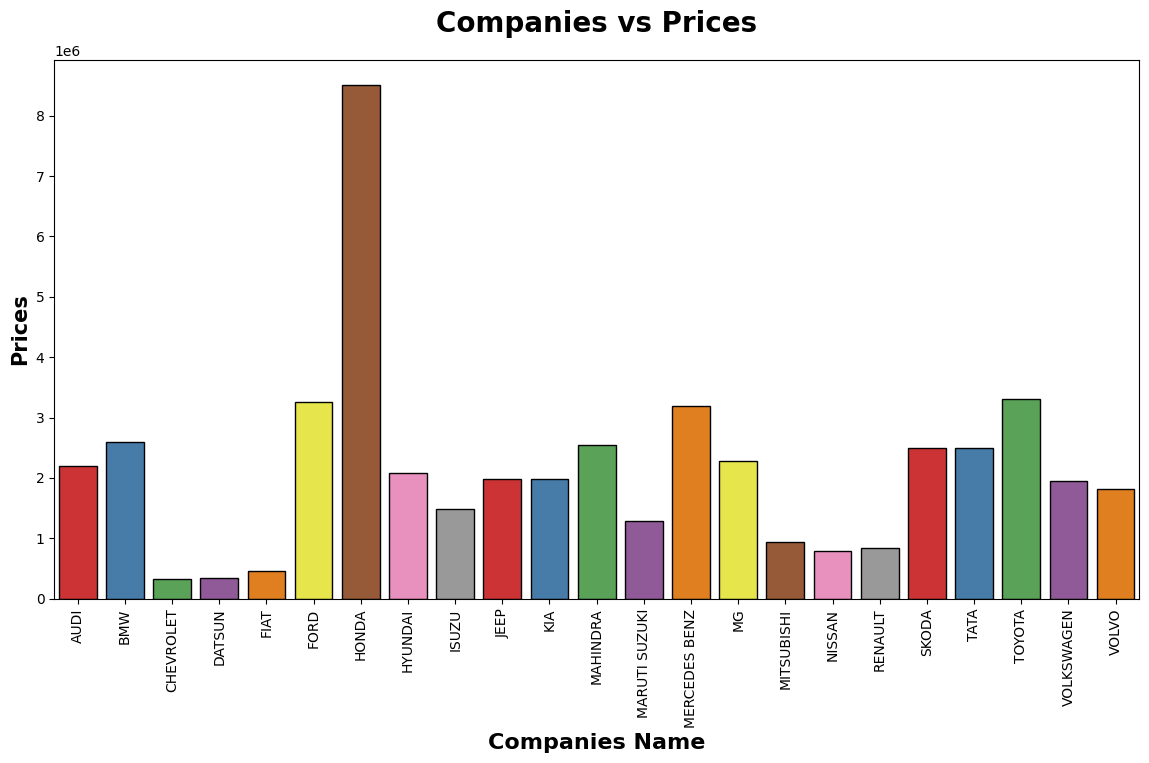

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.values,ec = "black",palette="Set1")
plt.title("Companies vs Prices", weight="bold",fontsize=20, pad=20)
plt.ylabel("Prices", weight="bold", fontsize=15)
plt.xlabel("Companies Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

 Removed one record the is very distrubing the chart price 8500000

In [ ]:
df_c2[df_c2['Company']=="HONDA"].sort_values(by='Prices',ascending= True)

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ModelYear,CngKit,Price,Owner,DealerState,Prices,DealerName,City,Warranty,QualityScore
183,HONDA,CITY ZX,VTEC,PETROL,Brown,50000,SEDAN,Manual,2008,NaN,2.55 Lakhs,3,Maharashtra,254999.0,Car&Bike Superstore Pune,Pune,0,6.8
248,HONDA,CITY,1.5 V MT,PETROL,Black,91000,SEDAN,Manual,2010,NaN,3 Lakhs,2,Maharashtra,300000.0,Car&Bike Superstore Pune,Pune,0,5.1
193,HONDA,BRIO,EX MT,PETROL,Urban Titanium,79640,HATCHBACK,Manual,2013,NaN,3.15 Lakhs,1,Maharashtra,315000.0,Car&Bike Superstore Pune,Pune,0,7.0
663,HONDA,CITY,1.5 S MT,PETROL,White,50000,SEDAN,Manual,2010,NaN,3.25 Lakhs,1,Uttar Pradesh,325000.0,Noida Car Ghar,Noida,0,7.0
984,HONDA,AMAZE,1.2 SMT I VTEC,PETROL,Silver,50114,SEDAN,Manual,2015,NaN,3.3 Lakhs,1,West Bengal,330000.0,Royal Motors (Prop. Auto Carriage Pvt Ltd),Kolkata,1,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,HONDA,CITY,ZX CVT PETROL,PETROL,Dark Grey,14241,SEDAN,NaN,2018,NaN,10.75 Lakhs,1,Haryana,1075000.0,Shree Radha Krishna Motors,Gurgaon,1,7.9
338,HONDA,CRV,2.4 L 4WD AVN,PETROL,Urban Titanium,83688,SUV,Automatic,2014,NaN,10.9 Lakhs,1,Delhi,1090000.0,Sai Motors,Delhi,1,7.2
955,HONDA,CITY 5TH GEN,VX CVT PETROL BS-VI,PETROL,Cherry Red,14353,SEDAN,NaN,2021,NaN,12.5 Lakhs,1,West Bengal,1250000.0,Royal Motors (Prop. Auto Carriage Pvt Ltd),Kolkata,1,8.0
814,HONDA,CITY 5TH GEN,ZX CVT PETROL BS-VI,PETROL,White,31090,SEDAN,NaN,2021,NaN,15.2 Lakhs,1,Telangana,1520000.0,Sri Vaishnavi Cars,Hyderabad,1,7.8


In [ ]:
# Check if the value exists before attempting to drop
if 8500000.0 in df_c2['Prices'].values:
    df_c2 = df_c2[df_c2['Prices'] != 8500000.0]
    print("Row(s) with price 8500000.0 dropped.")
else:
    print("No rows found with price 8500000.0")

# Display the modified DataFrame
df_c2

Row(s) with price 8500000.0 dropped.


,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ModelYear,CngKit,Price,Owner,DealerState,Prices,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018,NaN,5.75 Lakhs,1,Karnataka,575000.0,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021,NaN,4.35 Lakhs,1,Karnataka,434999.0,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015,NaN,4.7 Lakhs,1,Karnataka,470000.0,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020,NaN,9.9 Lakhs,1,Karnataka,990000.0,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010,NaN,2.7 Lakhs,2,Karnataka,270000.0,Zippy Automart,Bangalore,0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,HYUNDAI,ELITE I20(2020-2020),ASTA O 1.2 BS VI,PETROL,White,42918,HATCHBACK,NaN,2020,NaN,7.15 Lakhs,1,Rajasthan,715000.0,K.S. Motors,Jaipur,1,8.3
1060,HYUNDAI,XCENT(2017-2020),S,PETROL,White,78910,SEDAN,NaN,2019,NaN,5.00 Lakhs,1,Rajasthan,500000.0,Rajasthan Car World,Jaipur,0,7.8
1061,MAHINDRA,SCORPIO(2009-2014),VLX 2WD BS-III,DIESEL,White,76000,SUV,NaN,2013,NaN,5.75 Lakhs,1,Rajasthan,575000.0,Rajasthan Car World,Jaipur,0,6.8
1062,MARUTI SUZUKI,VITARA BREZZA,VDI,DIESEL,Silver,80120,HATCHBACK,NaN,2018,NaN,7.71 Lakhs,1,Rajasthan,771000.0,Rajasthan Car World,Jaipur,0,7.4


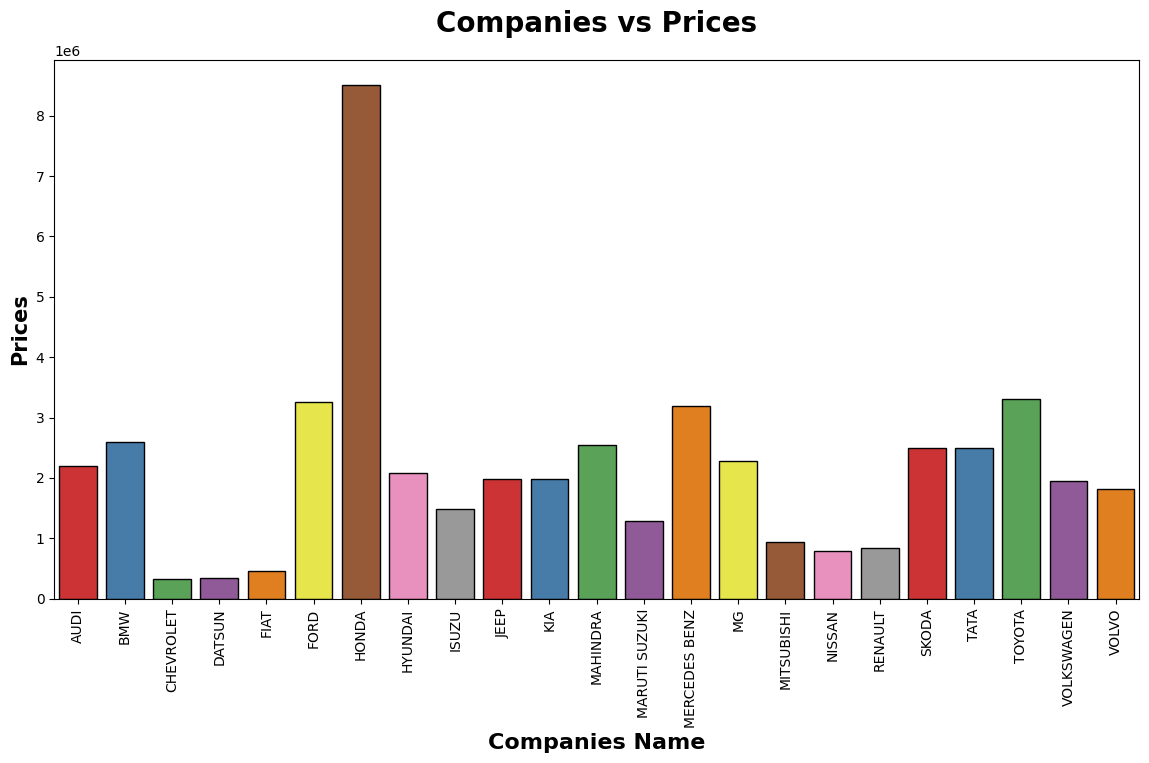

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.values,ec = "black",palette="Set1")
plt.title("Companies vs Prices", weight="bold",fontsize=20, pad=20)
plt.ylabel("Prices", weight="bold", fontsize=15)
plt.xlabel("Companies Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

# Expensive Model

**Report**
- The most expensive model is FORTUNER followed by ENDEAVOUR.
- The most sold car is FORTUNER.

In [ ]:
car= df_c2.groupby('Model').Prices.max()
car =car.to_frame().sort_values('Prices',ascending=False)[0:10]
car

,Prices
Model,
FORTUNER,3300000.0
ENDEAVOUR,3250000.0
ML CLASS,3190000.0
ENDEAVOUR(2016_2019),3100000.0
CLA CLASS,2850000.0
X1,2595000.0
XUV700,2550000.0
SUPERB,2500000.0
SAFARI,2495000.0


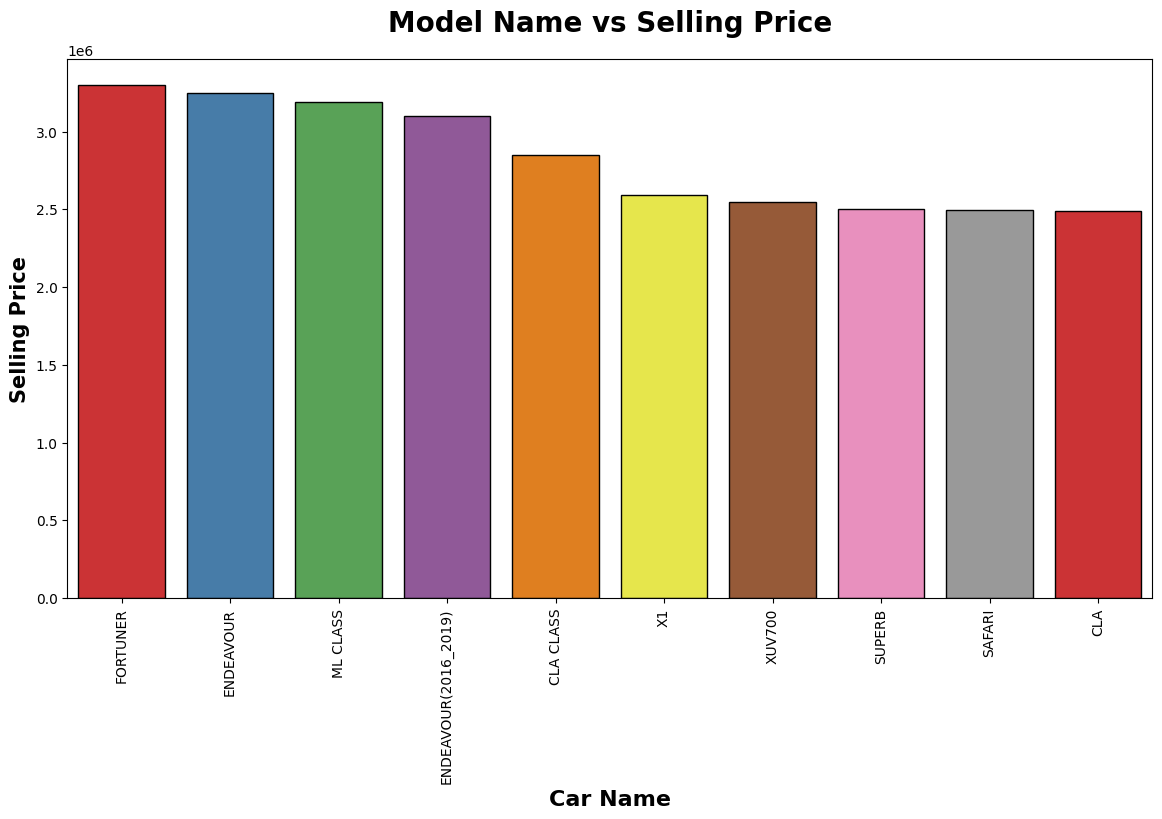

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car['Prices'],ec = "black",palette="Set1")
plt.title("Model Name vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

# Kilometer with Company
**Report**
- The most Kilometer running car company is FLAT.
- Followed by VOLVO and MERCEDES BENZ.

In [ ]:
Kilometer=df_c2.groupby('Company')['Kilometer'].mean().sort_values(ascending=False).head(10)
Kilometer.to_frame()

,Kilometer
Company,
FIAT,103000.000000
VOLVO,101519.000000
MERCEDES BENZ,85539.230769
MITSUBISHI,83740.000000
BMW,68579.000000
FORD,65055.379310
TOYOTA,64347.222222
SKODA,60683.800000
VOLKSWAGEN,58641.486486


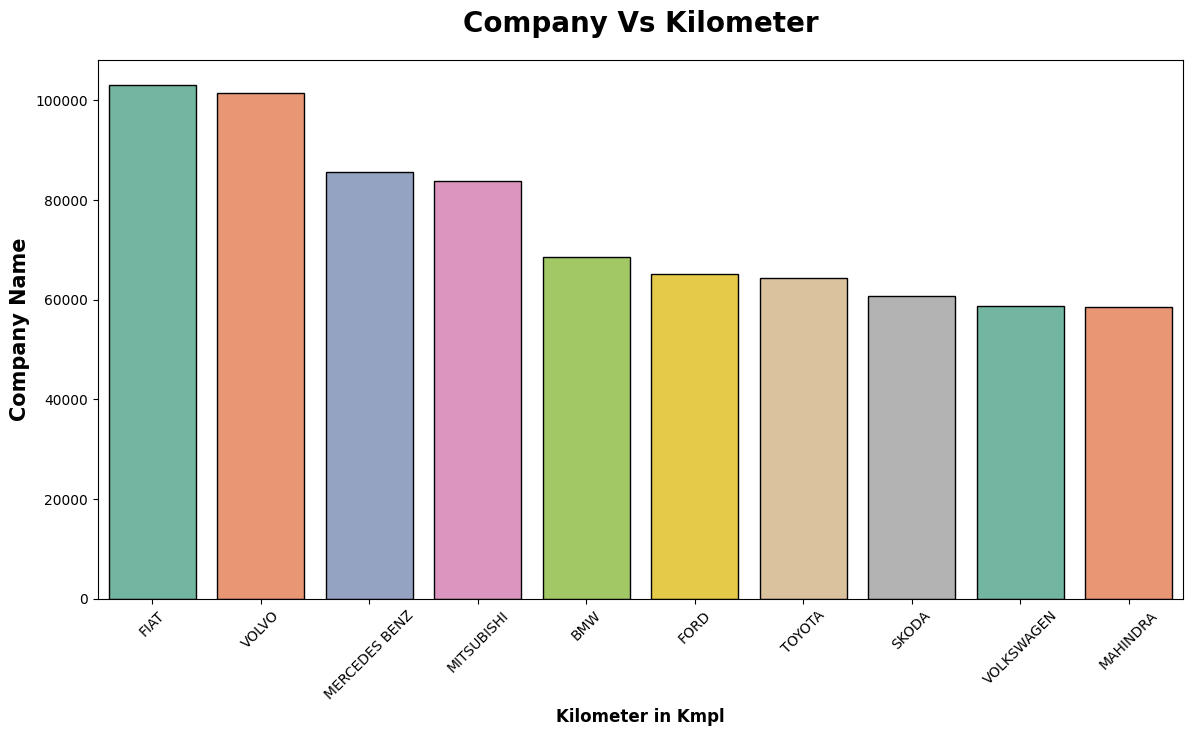

In [ ]:
plt.subplots(figsize=(14,7))
ax=sns.barplot(x=Kilometer.index, y=Kilometer.values,errorbar=None,ec = "black", palette="Set2")
plt.title("Company Vs Kilometer", weight="bold",fontsize=20, pad=20)
plt.ylabel("Company Name", weight="bold", fontsize=15)
plt.xlabel("Kilometer in Kmpl", weight="bold", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Model with Kilometer

**Report**
- The used car model cover kilometer is 177666km
- Model name is INNOVA(2012-2013)

In [ ]:
model=df_c2.groupby('Model')['Kilometer'].mean().sort_values(ascending=False).head(10)
model

,Kilometer
Model,
INNOVA(2012-2013),177666.000000
FIESTA(2008-2011),139196.000000
FIGO ASPIRE,137388.000000
E-CLASS(2009-2013),132565.000000
XC 60,127038.000000
FIGO(2012-2015),120000.000000
ML CLASS,114736.000000
TUCSON,113949.333333
C CLASS,110000.000000


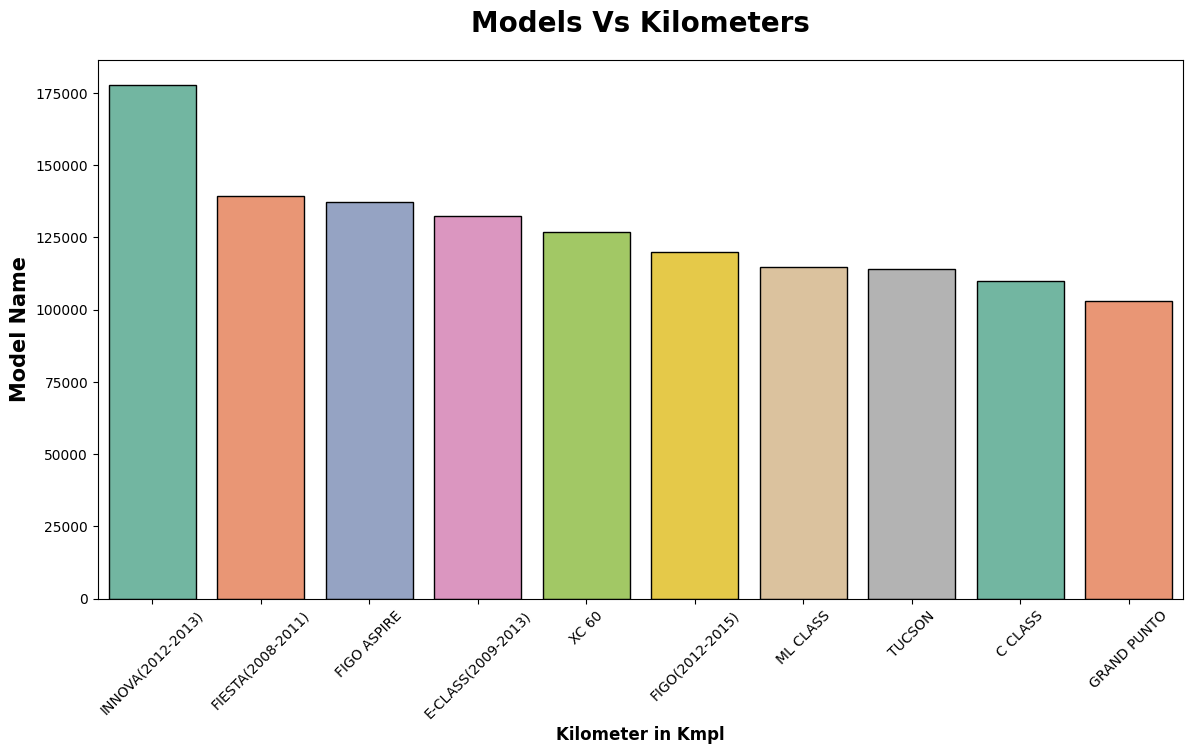

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=model.index, y= model.values,errorbar=None,ec = "black", palette="Set2")
plt.title("Models Vs Kilometers", weight="bold",fontsize=20, pad=20)
plt.ylabel("Model Name", weight="bold", fontsize=15)
plt.xlabel("Kilometer in Kmpl", weight="bold", fontsize=12)

plt.xticks(rotation=45)
plt.show()

# FuelType With Prices
**Report**

- The most expensive fuel is a Hybrid.
- The most sold fuel is Petrol.

In [ ]:
Fuel=df_c2.groupby('FuelType')['Prices'].median().sort_values(ascending=False)
Fuel

,Prices
FuelType,
HYBRID,1875000.0
DIESEL,899000.0
PETROL,595000.0
CNG,527500.0
LPG,350000.0


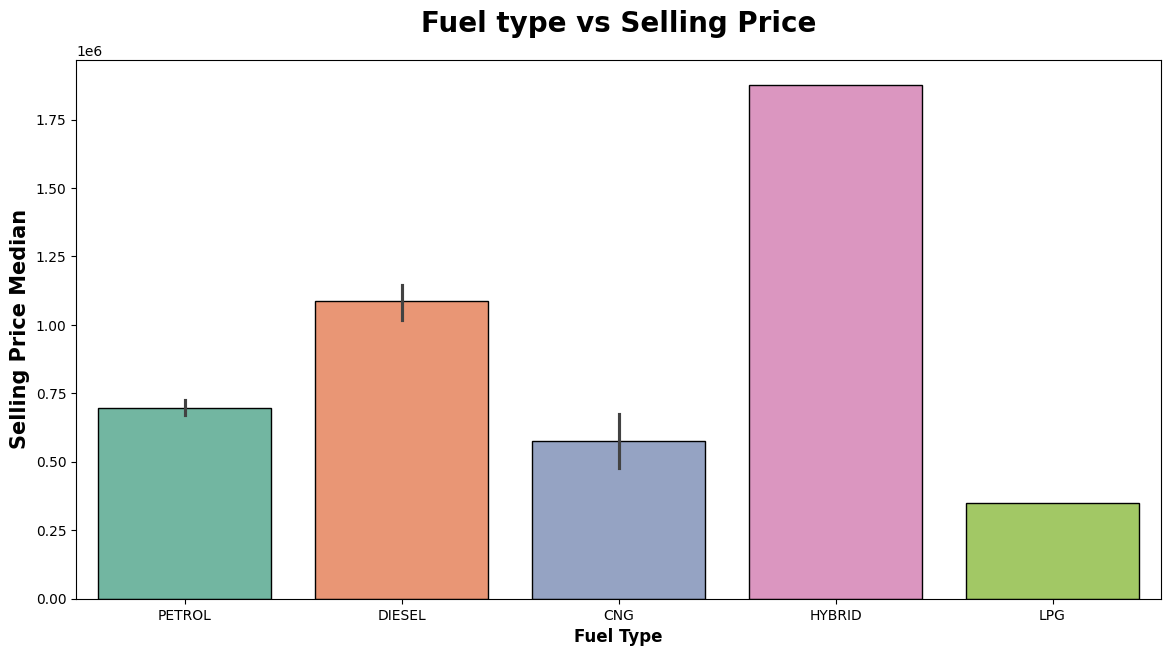

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df_c2.FuelType, y=df_c2.Prices, ec = "black", palette="Set2")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

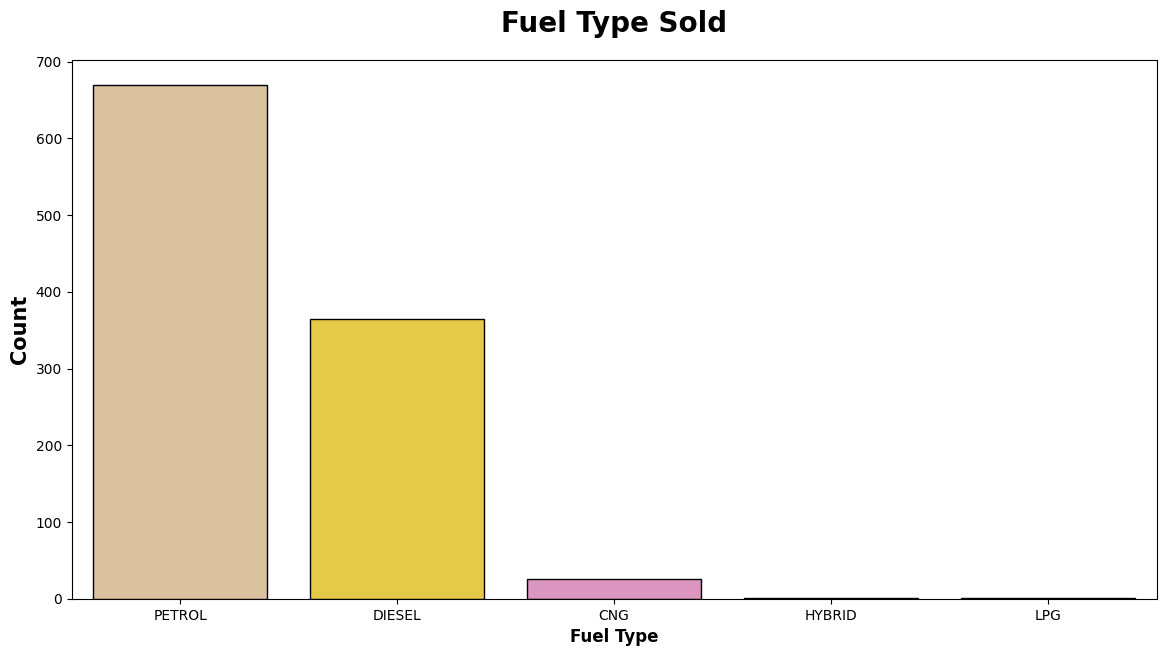

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df_c2.FuelType, ec = "black", palette="Set2_r")
plt.title("Fuel Type Sold", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

# Fuel Type and Kilometer

- Diesel fuel type cars cover most kilometers.


In [ ]:
Fuel_milage=df_c2.groupby('FuelType')['Kilometer'].mean().sort_values(ascending=False)
Fuel_milage.to_frame()

,Kilometer
FuelType,
DIESEL,65458.408219
LPG,60179.000000
PETROL,46274.980568
CNG,45537.846154
HYBRID,16532.000000


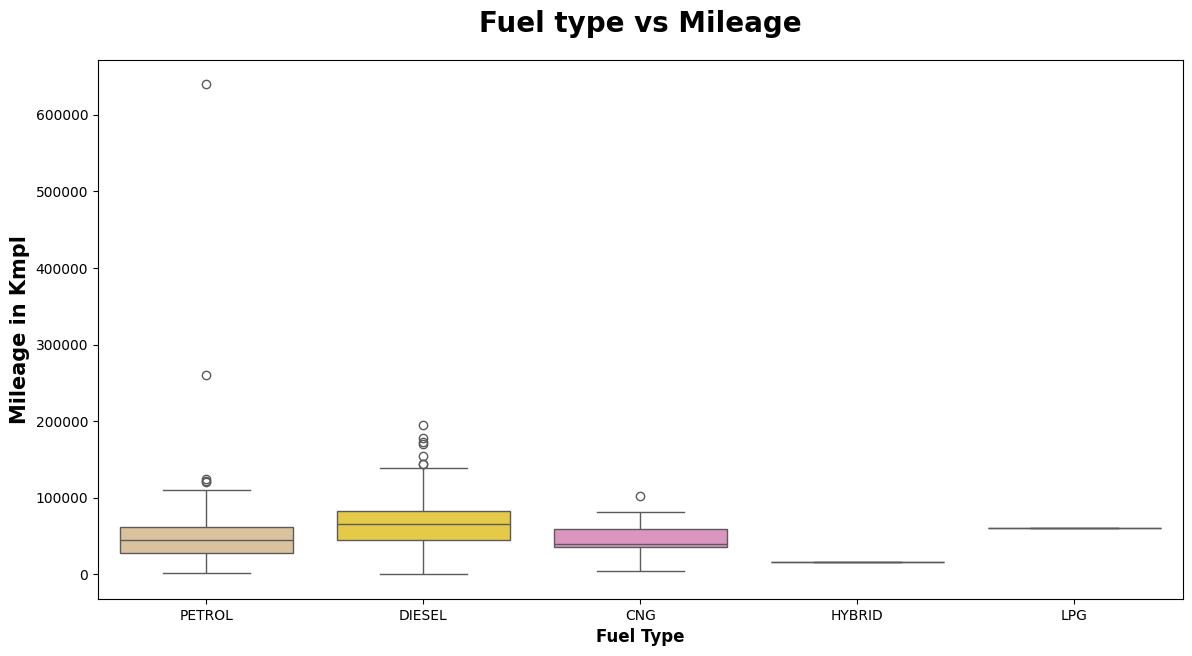

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='FuelType', y='Kilometer', data=df_c2,palette="Set2_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

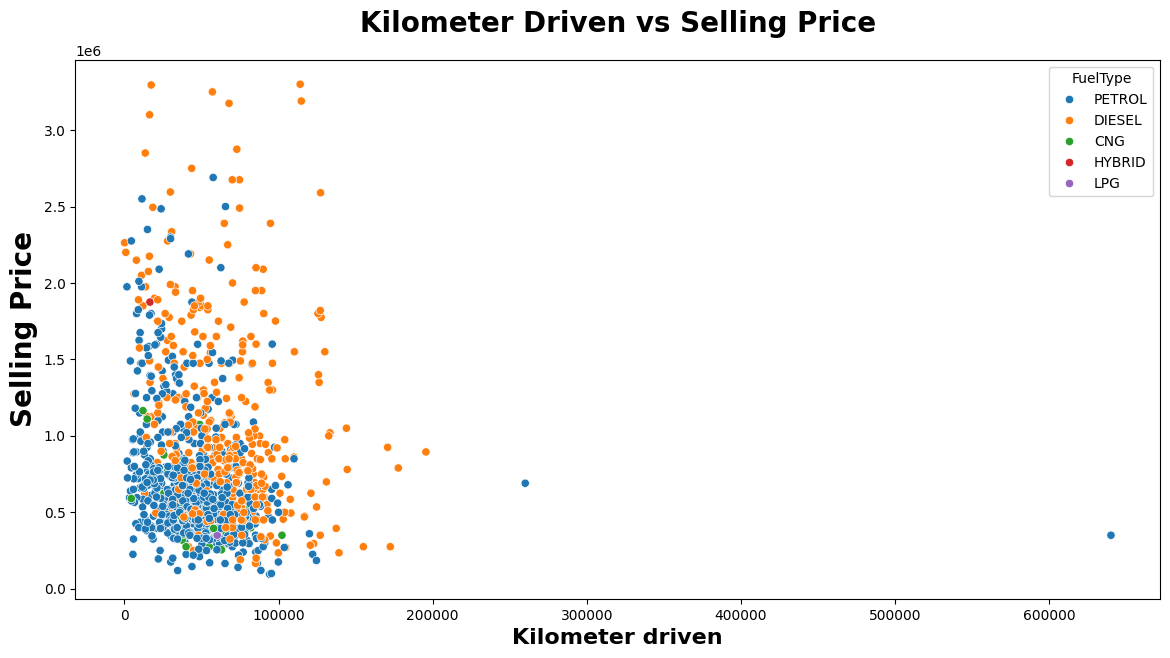

In [ ]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="Kilometer", y='Prices', data=df_c2,ec = "white",color='b',hue='FuelType')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

# Kilometer Distribution

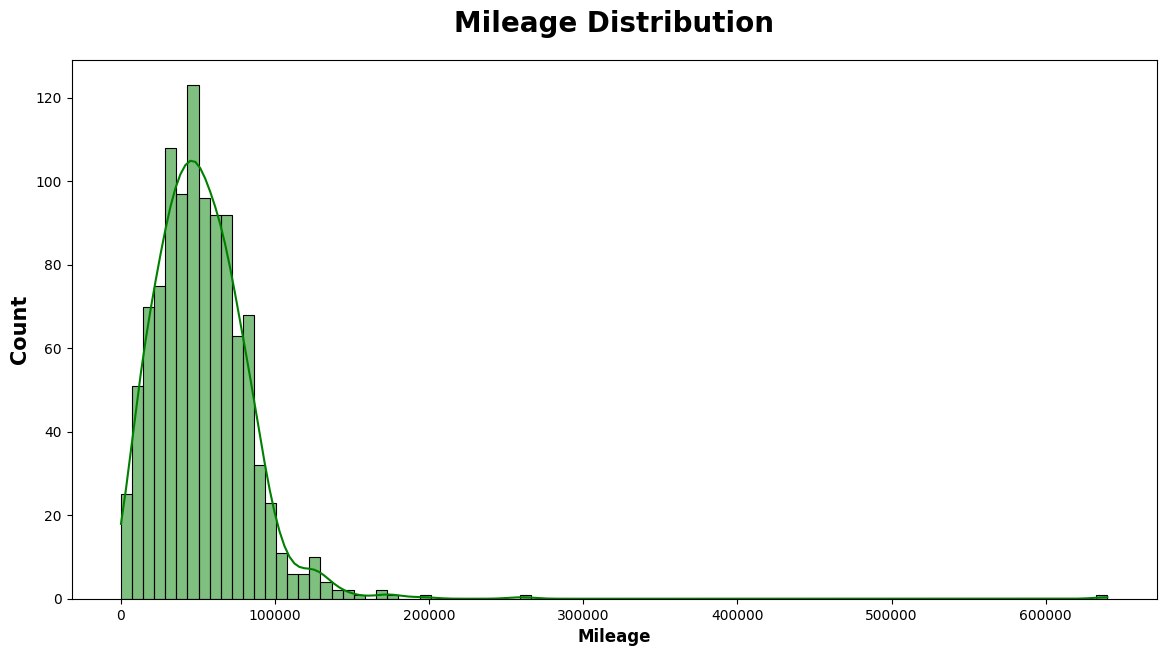

In [ ]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df_c2.Kilometer, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

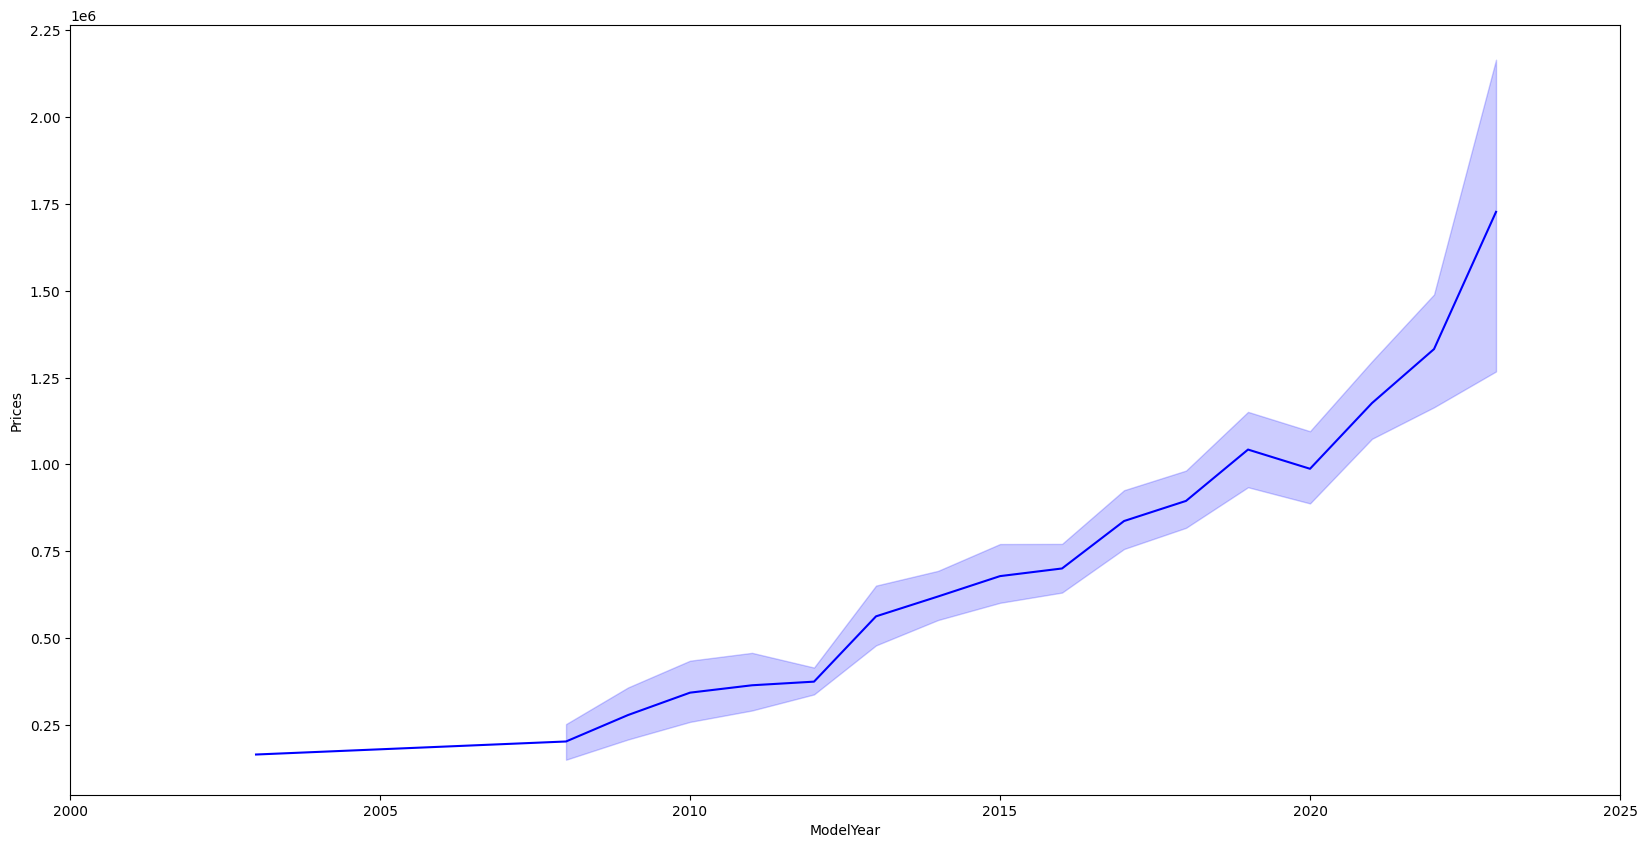

In [ ]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='ModelYear',y='Prices',data=df_c2,color='b')
plt.xlim(2000,2025)
plt.show()

# ModelYear with Kilometer
**Report**
- 2008 Year model cars cover most distance in used cars.

In [ ]:
vehicle_age = df.groupby('ModelYear')['Kilometer'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(10)

,Kilometer
ModelYear,
2008,91945.5
2003,86140.0
2009,81048.5
2010,72340.0
2011,70000.0
2012,69000.0
2013,67935.0
2014,67315.5
2015,60577.0


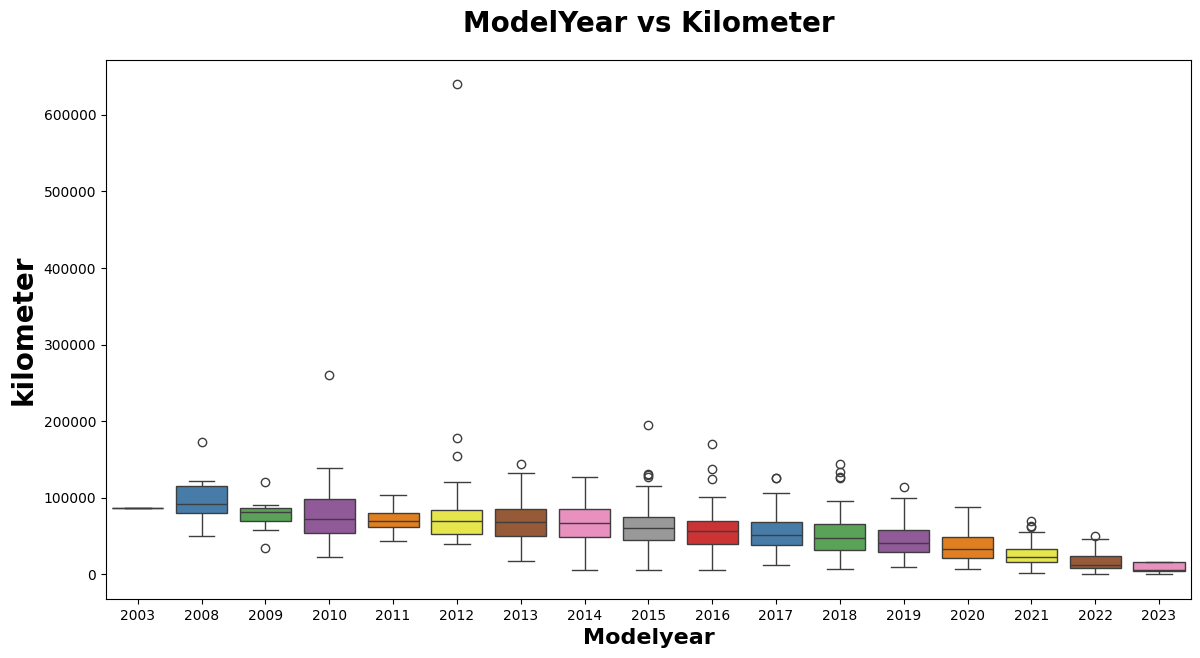

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x= df_c2.ModelYear, y= df_c2.Kilometer, palette="Set1")
plt.title("ModelYear vs Kilometer", weight="bold",fontsize=20, pad=20)
plt.ylabel("kilometer", weight="bold", fontsize=20)
plt.xlabel("Modelyear", weight="bold", fontsize=16)
plt.show()

# Transmission Type

- There are 3 types of transmission type.
- The most Manual Transmission type cars.
- The most expensive CVTs Transmission type cars.

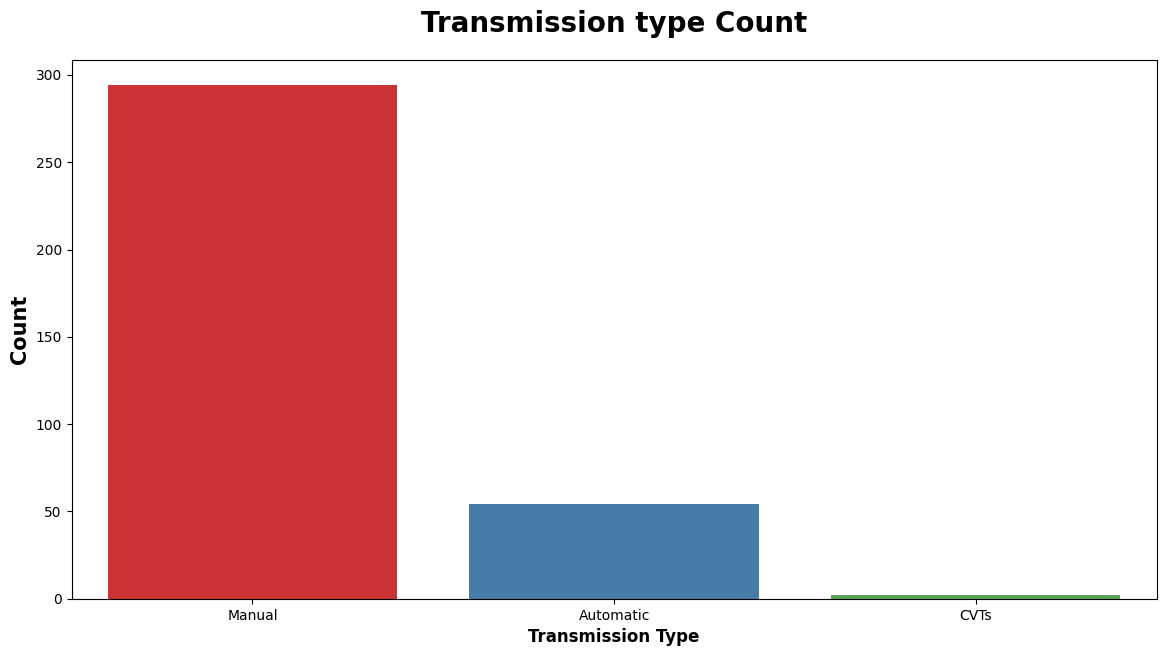

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df_c2.TransmissionType, data=df_c2,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

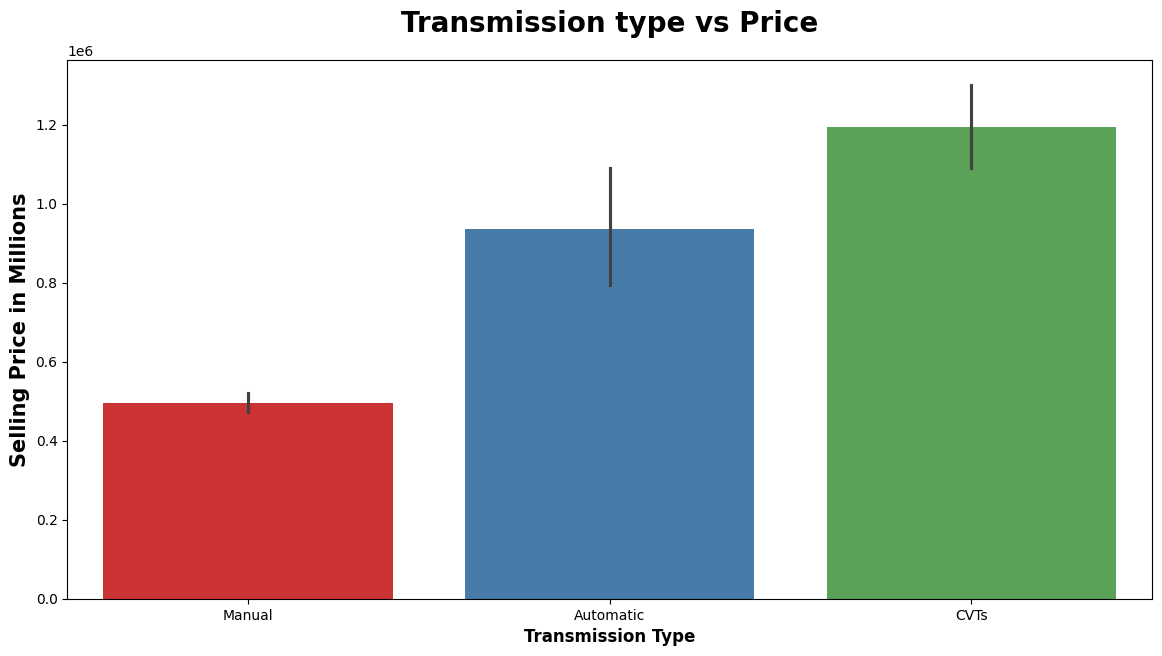

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x='TransmissionType', y='Prices', data=df_c2,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

# DealerName

**Report**
- The most sold used car dealer is Car Choice Exculsif and followed by car & Bike Superstore Pune.

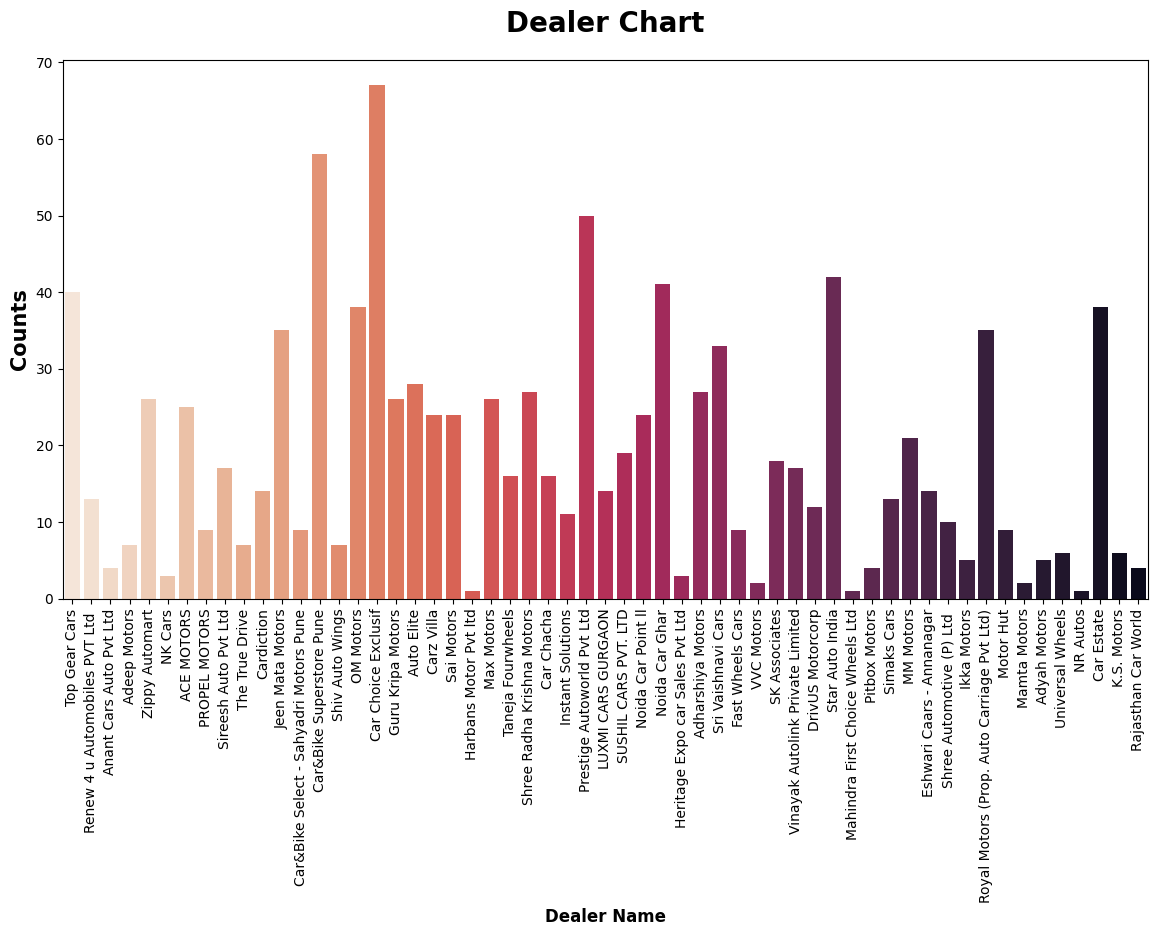

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x='DealerName', data=df_c2,palette="rocket_r")
plt.title("Dealer Chart", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("Dealer Name", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

In [ ]:
dealer = df_c2.groupby('DealerName')['Prices'].median().sort_values(ascending=False).head(10)
dealer.to_frame()

,Prices
DealerName,
SUSHIL CARS PVT. LTD,1475000.0
Car Estate,1407500.0
Fast Wheels Cars,1190000.0
Carz Villa,1157500.0
Star Auto India,1077499.5
K.S. Motors,1037500.0
Car Choice Exclusif,1025000.0
LUXMI CARS GURGAON,1012500.0
Guru Kripa Motors,970000.0


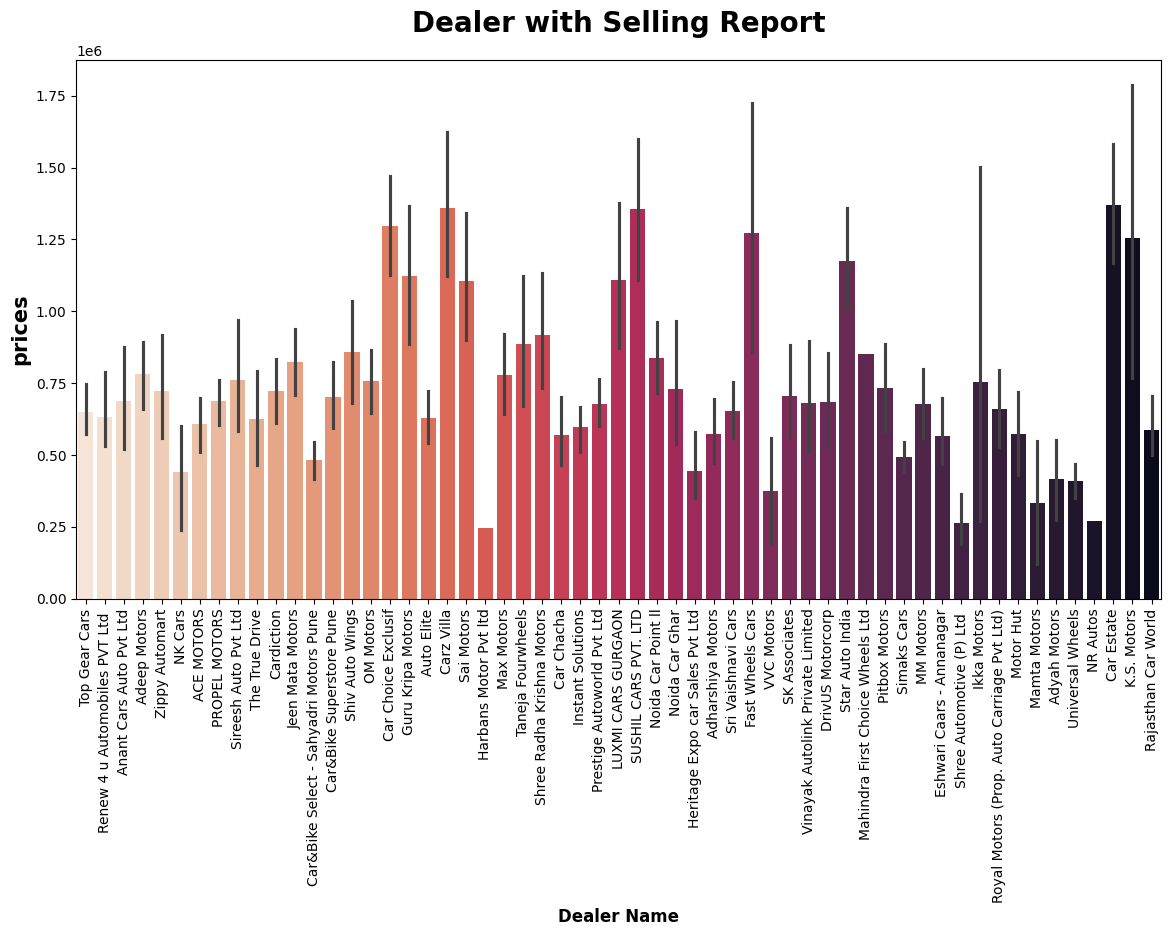

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x='DealerName',y='Prices', data=df_c2,palette="rocket_r") # Changed to sns.barplot
plt.title("Dealer with Selling Report", weight="bold",fontsize=20, pad=20)
plt.ylabel("prices", weight="bold", fontsize=15)
plt.xlabel("Dealer Name", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

**Report**

# **Final Report**
- The Most of Used car is pertol fuel type.
- The Most of Used cars purchase colour is white.
- The Most Used car Buying is the Maruti Suzuki.
- The Most of Expensive car is FORTUNER.
- The Most Used cars sold by Car Choice Exculsif.

In [ ]:
df_c2.to_csv("Used car dataset.csv")